In [4]:
pd.read_csv('df_all.csv')

Unnamed: 0         0         1         2         3         4  \
0                0  4233.462  4149.744  4195.000  4192.179  4136.282   
1                1  4231.795  4141.410  4194.103  4208.974  4135.385   
2                2  4226.282  4138.974  4191.923  4198.077  4148.333   
3                3  4235.641  4167.692  4198.846  4199.231  4165.256   
4                4  4247.436  4188.974  4207.051  4223.718  4162.436   
...            ...       ...       ...       ...       ...       ...   
279995       19995  4225.513  4227.564  4222.692  4213.846  4222.564   
279996       19996  4223.205  4221.026  4223.590  4205.897  4213.333   
279997       19997  4222.436  4220.128  4224.487  4204.872  4217.564   
279998       19998  4223.462  4215.256  4222.692  4206.667  4220.000   
279999       19999  4212.821  4202.179  4214.103  4198.590  4213.077   

               5         6         7         8         9        10        11  \
0       4193.333  4199.872  4195.769  4184.231  4253.846  4195.000  4185.769   
1       4189.615  4190.769  4184.103  4177.436  4245.385  4189.359  4178.205   
2       4202.692  4180.769  4167.308  4164.487  4234.872  4178.974  4163.333   
3       4218.077  4186.282  4176.026  4172.436  4233.974  4191.667  4179.487   
4       4208.077  4190.641  4183.205  4175.128  4235.513  4201.923  4194.487   
...          ...       ...       ...       ...       ...       ...       ...   
279995  4218.205  4206.667  4218.718  4233.333  4239.231  4241.667  4230.641   
279996  4210.385  4211.410  4213.462  4224.744  4226.026  4231.795  4228.333   
279997  4218.846  4223.077  4212.564  4224.487  4219.487  4227.179  4226.282   
279998  4223.333  4217.051  4209.359  4217.051  4218.590  4225.513  4224.487   
279999  4211.410  4204.359  4208.077  4204.231  4209.487  4214.487  4216.026   

              12        13  sample_num  label  
0       4188.462  4171.282           0      1  
1       4178.718  4167.436           0      1  
2       4163.462  4157.949           0      1  
3       4176.667  4174.103           0      1  
4       4189.359  4192.436           0      1  
...          ...       ...         ...    ...  
279995  4242.308  4232.821        2799      1  
279996  4231.026  4227.564        2799      1  
279997  4222.051  4222.436        2799      1  
279998  4224.615  4217.179        2799      1  
279999  4218.462  4207.436        2799      1  

[280000 rows x 17 columns]

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('df_all.csv').drop(['Unnamed: 0'], axis = 1)
data.columns = [ str(0), str(1), str(2), str(3), str(4), str(5),str(6),str(7),str(8),str(9),str(10),str(11),str(12),str(13),'sample_num', 'gesture']

#data = data.drop(['Unnamed: 0'], axis = 1)
d_t = pd.DataFrame(StandardScaler().fit_transform(data.drop(['sample_num', 'gesture'], axis = 1)))
d_t['gesture'] = data['gesture']
d_t['sample_num'] = data['sample_num']
data = d_t
#data = data.sample(frac=1).reset_index(drop=True)
data.shape
len(data['sample_num'].unique())

2800

In [6]:
import numpy as np
import random
np_lst = []
sample_nums_rand = data['sample_num'].unique()
#random.shuffle(sample_nums_rand)
for n in sample_nums_rand:
    sample = data[data['sample_num'] == n].drop(['sample_num', 'gesture'], axis = 1)
    np_lst.append(sample.values)
    
data_reshaped = np.array(np_lst).reshape((2800, 1, 14,100))
np_lst

[array([[ 0.3873134 , -0.50698992, -0.24376927, ..., -0.16020482,
         -0.11662451, -0.27678596],
        [ 0.36403301, -0.58336319, -0.26433052, ..., -0.22655424,
         -0.18496449, -0.30630495],
        [ 0.28704156, -0.60568684, -0.31430101, ..., -0.35700751,
         -0.29196314, -0.37912   ],
        ...,
        [ 0.19573553, -0.07933991,  0.15883702, ..., -0.05786497,
         -0.1238204 ,  0.12075334],
        [ 0.35865632,  0.15093458,  0.2205437 , ..., -0.0128835 ,
         -0.13281177,  0.1719242 ],
        [ 0.45714058,  0.3436181 ,  0.25875508, ..., -0.04886516,
         -0.13281177,  0.12370831]]),
 array([[ 0.45355146,  0.26372583,  0.32046175, ..., -0.10846912,
         -0.16158835,  0.10205644],
        [ 0.32463651,  0.09924012,  0.22936876, ..., -0.16357317,
         -0.28027858,  0.07351988],
        [ 0.28346641,  0.18383355,  0.12062564, ..., -0.17369575,
         -0.33692699,  0.07155502],
        ...,
        [-0.40049088, -0.06876459,  0.99050185, ..., -

In [7]:
from keras.utils import to_categorical
y = data[['gesture', 'sample_num']]
l = []
for i in sample_nums_rand:
    s_y = y[y['sample_num']==i]
    if(s_y['gesture'].iloc[0] == 'сжать руку'):
        l.append(0)
    else:
        l.append(1)
#print(data['gesture'])      
y = to_categorical(np.array(l).reshape((len(l), )))
y

Using TensorFlow backend.


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

from sklearn.model_selection import train_test_split
def shuffle_split(train_size = 0.9):
    X_train, X_validate, Y_train, Y_validate = train_test_split(data_reshaped, y, test_size = 1-train_size)
    X_validate, X_test, Y_validate, Y_test = train_test_split(X_validate, Y_validate, test_size = 0.5)
    return X_train, X_validate, X_test, Y_train, Y_validate, Y_test
X_train, X_validate, X_test, Y_train, Y_validate, Y_test = shuffle_split(0.90)

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
X =  data_reshaped
def shuffle_split(train_size = 0.9):
    sss = StratifiedShuffleSplit(n_splits = 1, test_size = 1-train_size)
    for train_index, test_index in sss.split(data_reshaped, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = data_reshaped[train_index], data_reshaped[test_index]
        y_train, y_test = y[train_index], y[test_index]
    return X_train,  X_test, y_train, y_test
#X_train, X_test, Y_train, Y_test = shuffle_split(0.90)
X_train = X[:2400]
X_test = X[2400:]
y_train = y[:2400]
y_test = y[2400:]


from sklearn.model_selection import train_test_split
from EEGModels import  EEGNet
kernels, chans, samples = 1, 14, 100
class_weights = {0:1, 1:1, 2:1, 3:1}
#X_train, X_validate, Y_train, Y_validate = train_test_split(data_reshaped, y, test_size = 0.10,shuffle = True)
model2 = EEGNet(nb_classes = 2, Chans = chans, Samples = samples,  
               dropoutRate = 0.5, kernLength = 32, F1 = 8, D = 2, F2 = 16, 
               dropoutType = 'Dropout')
model2.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])
fittedModel    = model2.fit(X_train, Y_train, epochs = 25, validation_data=(X_validate, Y_validate),
                        verbose = 1, class_weight = class_weights)
#model2.load_weights('./examples/EEGNet-8-2-weights.h5')
probs       = model2.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == Y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

In [30]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

from EEGModels import   ShallowConvNet
from EEGModels import   DeepConvNet
from EEGModels import EEGNet
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import metrics
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
# model configurations may do better, but this is a good starting point)
model  = DeepConvNet(nb_classes = 2, Chans = 14, Samples = 100)

# compile the model and set the optimizers
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['categorical_accuracy'])#, auroc])

# count number of parameters in the model
numParams    = model.count_params()    

# set a valid path for your system to record model checkpoints
checkpointer = ModelCheckpoint(filepath='./checkpoint.h5', verbose=1,
                               save_best_only=True)

###############################################################################
# if the classification task was imbalanced (significantly more trials in one
# class versus the others) you can assign a weight to each class during 
# optimization to balance it out. This data is approximately balanced so we 
# don't need to do this, but is shown here for illustration/completeness. 
###############################################################################

# the syntax is {class_1:weight_1, class_2:weight_2,...}. Here just setting
# the weights all to be 1
class_weights = {0:1, 1:1}

################################################################################
# fit the model. Due to very small sample sizes this can get
# pretty noisy run-to-run, but most runs should be comparable to xDAWN + 
# Riemannian geometry classification (below)
################################################################################
fittedModel = model.fit(X_train, Y_train, batch_size = 32, epochs = 150, 
                        verbose = 2, validation_split = 0.1,#validation_data=(X_validate, Y_validate),
                        callbacks=[checkpointer])

# load optimal weights
model.load_weights('./checkpoint.h5')

###############################################################################
# can alternatively used the weights provided in the repo. If so it should get
# you 93% accuracy. Change the WEIGHTS_PATH variable to wherever it is on your
# system.
###############################################################################

# WEIGHTS_PATH = /path/to/EEGNet-8-2-weights.h5 
# model.load_weights(WEIGHTS_PATH)

###############################################################################
# make prediction on test set.
###############################################################################

probs       = model.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == Y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

#print("Classification accuracy: %f " % (auroc(Y_test.argmax(axis=-1), preds)))

X_train shape: (1050, 1, 14, 100)
1050 train samples
117 test samples
Train on 945 samples, validate on 105 samples
Epoch 1/150

Epoch 00001: val_loss improved from inf to 0.76045, saving model to ./checkpoint.h5
945/945 - 6s - loss: 0.7838 - categorical_accuracy: 0.5005 - val_loss: 0.7605 - val_categorical_accuracy: 0.4667
Epoch 2/150

Epoch 00002: val_loss improved from 0.76045 to 0.69484, saving model to ./checkpoint.h5
945/945 - 1s - loss: 0.7812 - categorical_accuracy: 0.5132 - val_loss: 0.6948 - val_categorical_accuracy: 0.4952
Epoch 3/150

Epoch 00003: val_loss did not improve from 0.69484
945/945 - 0s - loss: 0.7214 - categorical_accuracy: 0.5249 - val_loss: 0.6953 - val_categorical_accuracy: 0.4952
Epoch 4/150

Epoch 00004: val_loss did not improve from 0.69484
945/945 - 0s - loss: 0.7349 - categorical_accuracy: 0.4899 - val_loss: 0.7260 - val_categorical_accuracy: 0.5143
Epoch 5/150

Epoch 00005: val_loss did not improve from 0.69484
945/945 - 0s - loss: 0.7430 - categorical_

Epoch 46/150

Epoch 00046: val_loss did not improve from 0.68694
945/945 - 0s - loss: 0.6962 - categorical_accuracy: 0.5661 - val_loss: 0.6958 - val_categorical_accuracy: 0.4857
Epoch 47/150

Epoch 00047: val_loss did not improve from 0.68694
945/945 - 0s - loss: 0.6963 - categorical_accuracy: 0.5460 - val_loss: 0.6903 - val_categorical_accuracy: 0.4857
Epoch 48/150

Epoch 00048: val_loss did not improve from 0.68694
945/945 - 0s - loss: 0.7031 - categorical_accuracy: 0.5746 - val_loss: 0.7338 - val_categorical_accuracy: 0.4190
Epoch 49/150

Epoch 00049: val_loss did not improve from 0.68694
945/945 - 0s - loss: 0.7142 - categorical_accuracy: 0.5312 - val_loss: 0.7434 - val_categorical_accuracy: 0.4571
Epoch 50/150

Epoch 00050: val_loss did not improve from 0.68694
945/945 - 0s - loss: 0.6979 - categorical_accuracy: 0.5651 - val_loss: 0.7244 - val_categorical_accuracy: 0.5048
Epoch 51/150

Epoch 00051: val_loss did not improve from 0.68694
945/945 - 0s - loss: 0.7009 - categorical_acc

Epoch 92/150

Epoch 00092: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.6511 - categorical_accuracy: 0.6169 - val_loss: 0.7309 - val_categorical_accuracy: 0.5143
Epoch 93/150

Epoch 00093: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.6579 - categorical_accuracy: 0.6180 - val_loss: 0.7628 - val_categorical_accuracy: 0.4762
Epoch 94/150

Epoch 00094: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.6692 - categorical_accuracy: 0.5820 - val_loss: 0.7123 - val_categorical_accuracy: 0.5429
Epoch 95/150

Epoch 00095: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.6626 - categorical_accuracy: 0.5968 - val_loss: 0.7537 - val_categorical_accuracy: 0.4952
Epoch 96/150

Epoch 00096: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.6665 - categorical_accuracy: 0.6053 - val_loss: 0.7562 - val_categorical_accuracy: 0.4952
Epoch 97/150

Epoch 00097: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.6509 - categorical_acc

Epoch 138/150

Epoch 00138: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.5801 - categorical_accuracy: 0.6794 - val_loss: 0.9711 - val_categorical_accuracy: 0.4762
Epoch 139/150

Epoch 00139: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.5824 - categorical_accuracy: 0.7005 - val_loss: 0.9372 - val_categorical_accuracy: 0.4667
Epoch 140/150

Epoch 00140: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.5762 - categorical_accuracy: 0.7132 - val_loss: 0.9670 - val_categorical_accuracy: 0.5048
Epoch 141/150

Epoch 00141: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.6322 - categorical_accuracy: 0.6677 - val_loss: 0.7761 - val_categorical_accuracy: 0.5238
Epoch 142/150

Epoch 00142: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.5599 - categorical_accuracy: 0.6995 - val_loss: 0.7694 - val_categorical_accuracy: 0.5524
Epoch 143/150

Epoch 00143: val_loss did not improve from 0.68330
945/945 - 0s - loss: 0.5837 - categoric

In [178]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
from deepexplain.tensorflow import DeepExplain
from tensorflow.keras import backend as K

# configure, compile and fit the model
from keras import backend as K
print(K.tensorflow_backend._get_available_gpus())

with DeepExplain(session = K.get_session()) as de:
    input_tensor   = model.layers[0].input
    fModel         = Model(inputs = input_tensor, outputs = model.layers[-2].output)    
    target_tensor  = fModel(input_tensor)    

    # can use epsilon-LRP as well if you like.
    attributions   = de.explain('deeplift', target_tensor * Y_test, input_tensor, X_test)
   # attributions = de.explain('elrp', target_tensor * Y_test, input_tensor, X_test)

['/job:localhost/replica:0/task:0/device:GPU:0']


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: You must feed a value for placeholder tensor 'input_35' with dtype float and shape [?,1,4,100]
	 [[node input_35 (defined at C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
	 [[batch_normalization_23/cond/Merge/_11511]]
  (1) Invalid argument: You must feed a value for placeholder tensor 'input_35' with dtype float and shape [?,1,4,100]
	 [[node input_35 (defined at C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]
0 successful operations.
0 derived errors ignored.

Original stack trace for 'input_35':
  File "C:\Users\ppkol\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ppkol\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ppkol\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\ppkol\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\ppkol\anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\ppkol\anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\ppkol\anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\ppkol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-132-cc2bd86fa96c>", line 16, in <module>
    D = 15, F2 = 321,  dropoutType = 'SpatialDropout2D')
  File "C:\Users\ppkol\Documents\arl-eegmodels-master\EEGModels.py", line 130, in EEGNet
    input1   = Input(shape = (1, Chans, Samples))
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\input_layer.py", line 265, in Input
    input_layer = InputLayer(**input_layer_config)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\input_layer.py", line 126, in __init__
    ragged=ragged)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\keras\backend.py", line 1051, in placeholder
    x = array_ops.placeholder(dtype, shape=shape, name=name)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 8039, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\Users\ppkol\anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [10]:

from EEGModels import EEGNet

from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import metrics
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# configure the EEGNet-8,2,16 model with kernel length of 32 samples (other 
# model configurations may do better, but this is a good starting point)
model  = EEGNet(2, Chans = 14, Samples = 100, 
             dropoutRate = 0.5, F1 = 8, kernLength = 200,norm_rate = 0.5,
             D = 2, F2 = 16,  dropoutType = 'SpatialDropout2D')

# compile the model and set the optimizers
model.compile(loss='categorical_crossentropy', optimizer='nadam', 
              metrics = ['categorical_accuracy'])

# count number of parameters in the model
numParams    = model.count_params()    

# set a valid path for your system to record model checkpoints
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1,
                               save_best_only=True)

###############################################################################
# if the classification task was imbalanced (significantly more trials in one
# class versus the others) you can assign a weight to each class during 
# optimization to balance it out. This data is approximately balanced so we 
# don't need to do this, but is shown here for illustration/completeness. 
###############################################################################

# the syntax is {class_1:weight_1, class_2:weight_2,...}. Here just setting
# the weights all to be 1

################################################################################
# fit the model. Due to very small sample sizes this can get
# pretty noisy run-to-run, but most runs should be comparable to xDAWN + 
# Riemannian geometry classification (below)
################################################################################
fittedModel = model.fit(X_train, y_train, batch_size = 64, epochs = 300, 
                        verbose = 2,validation_split = 0.1,
                        callbacks=[checkpointer])

# load optimal weights
model.load_weights('./checkpoit.h5')

###############################################################################
# can alternatively used the weights provided in the repo. If so it should get
# you 93% accuracy. Change the WEIGHTS_PATH variable to wherever it is on your
# system.
###############################################################################

# WEIGHTS_PATH = /path/to/EEGNet-8-2-weights.h5 
# model.load_weights(WEIGHTS_PATH)

###############################################################################
# make prediction on test set.
###############################################################################

probs       = model.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == Y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

X_train shape: (2400, 1, 14, 100)
2400 train samples
400 test samples
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


ValueError: Negative dimension size caused by subtracting 14 from 1 for 'depthwise_conv2d/depthwise' (op: 'DepthwiseConv2dNative') with input shapes: [?,1,14,8], [14,1,8,2].

In [9]:
attributions

array([[[[ 2.09438440e-04,  8.94588084e-05,  3.15304729e-04, ...,
           2.49346299e-03,  8.92072203e-05, -6.30882005e-06],
         [-4.12901019e-04, -3.21484986e-04,  6.01006941e-05, ...,
           2.05224296e-05,  1.51735047e-04,  5.80680324e-04],
         [ 6.64648425e-04,  2.58259679e-05, -9.64258506e-05, ...,
           4.05874685e-04,  9.36001481e-04,  2.31570681e-04],
         ...,
         [-3.54289409e-06, -2.19147172e-04,  1.97797199e-03, ...,
           1.47158527e-04,  1.22535988e-04,  1.19205576e-03],
         [ 6.25037297e-04, -1.10199073e-06, -6.93810754e-04, ...,
          -2.41046844e-04,  1.86152838e-03,  9.68490203e-05],
         [ 2.50828569e-04,  1.59226474e-05,  3.42451094e-05, ...,
          -8.17976616e-05, -7.29046296e-04, -6.57093042e-05]]],


       [[[ 6.11516089e-06, -7.95308915e-06, -5.06023025e-06, ...,
          -2.39905294e-05,  9.33488764e-07,  3.46849447e-05],
         [ 4.45227415e-05,  1.80102052e-05,  2.10797097e-07, ...,
          -2.1364538

In [14]:
preds
Y_test.argmax(axis=-1)

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

Label is #[0. 1.]
Wrong prediction
Test sample #0


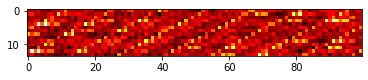

Importance map #0


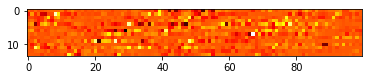

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #1


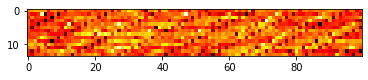

Importance map #1


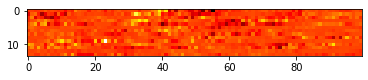

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #2


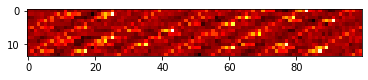

Importance map #2


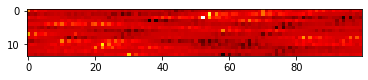

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #3


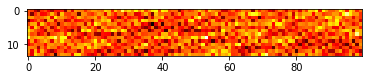

Importance map #3


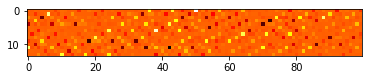

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #4


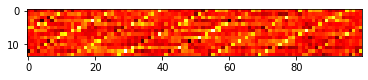

Importance map #4


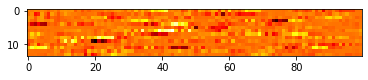

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #5


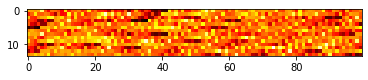

Importance map #5


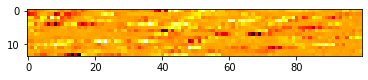

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #6


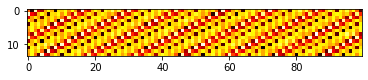

Importance map #6


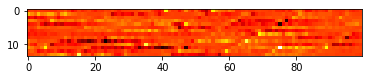

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #7


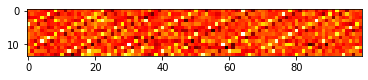

Importance map #7


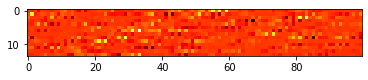

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #8


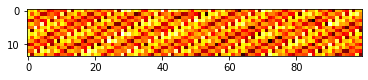

Importance map #8


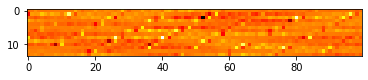

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #9


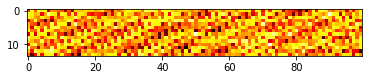

Importance map #9


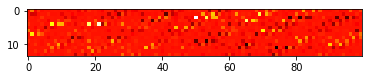

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #10


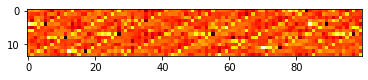

Importance map #10


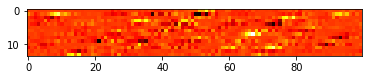

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #11


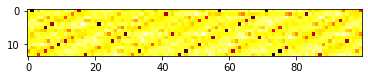

Importance map #11


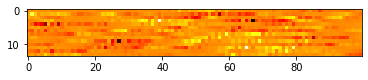

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #12


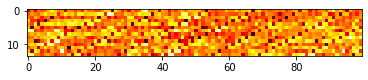

Importance map #12


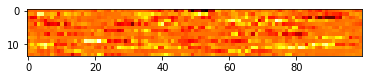

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #13


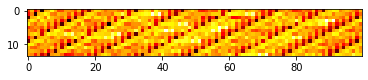

Importance map #13


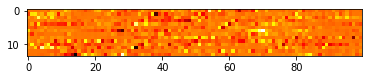

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #14


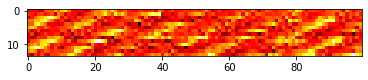

Importance map #14


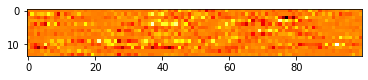

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #15


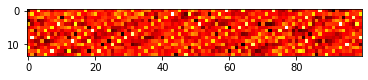

Importance map #15


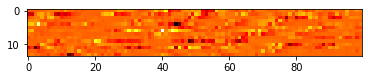

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #16


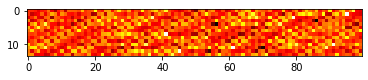

Importance map #16


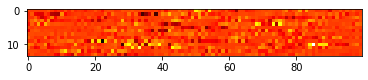

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #17


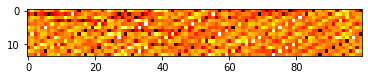

Importance map #17


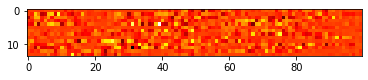

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #18


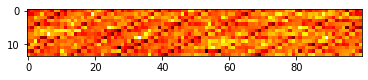

Importance map #18


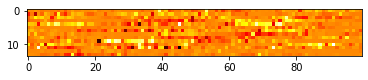

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #19


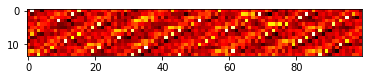

Importance map #19


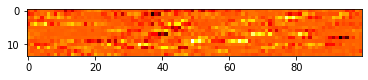

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #20


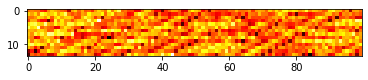

Importance map #20


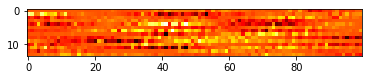

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #21


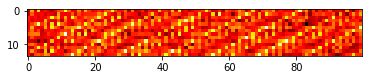

Importance map #21


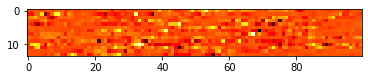

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #22


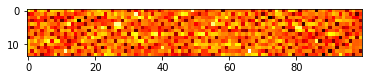

Importance map #22


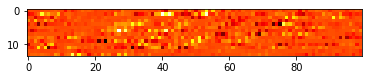

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #23


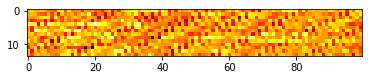

Importance map #23


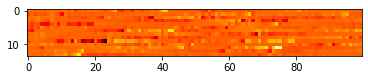

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #24


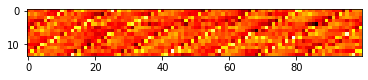

Importance map #24


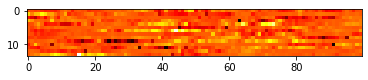

###############
###############
###############

Label is #[1. 0.]
Wrong prediction
Test sample #25


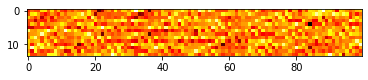

Importance map #25


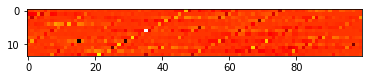

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #26


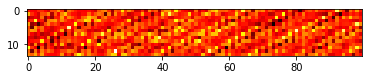

Importance map #26


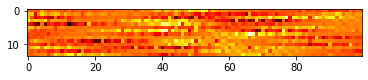

###############
###############
###############

Label is #[1. 0.]
Correct prediction
Test sample #27


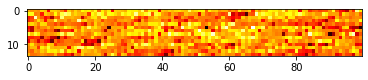

Importance map #27


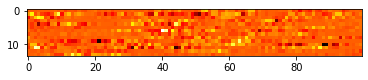

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #28


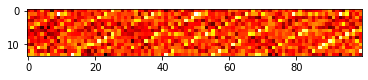

Importance map #28


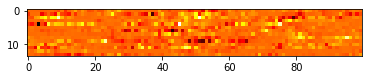

###############
###############
###############

Label is #[0. 1.]
Wrong prediction
Test sample #29


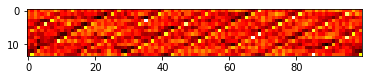

Importance map #29


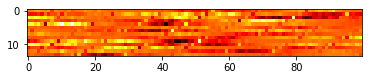

###############
###############
###############

Label is #[0. 1.]
Correct prediction
Test sample #30


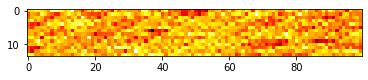

Importance map #30


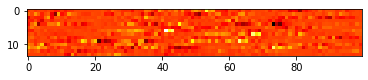

###############
###############
###############



In [179]:
from matplotlib import pyplot as plt

for i in range(0, 31):
    print("Label is #{}".format(Y_test[i]))
    if(preds[i] == Y_test.argmax(axis=-1)[i]):
        print("Correct prediction")
    else:
        print("Wrong prediction")
    print("Test sample #{}".format(i))
    plt.imshow(X_test[i,0,:,:], cmap='hot', interpolation='nearest')
    plt.show()
    print("Importance map #{}".format(i))
    plt.imshow(attributions[i,0,:,:], cmap='hot', interpolation='nearest')
    plt.show()
    print("###############\n###############\n###############\n")

Label is #[0. 1.]
Test sample #0


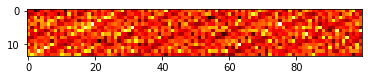

###############
###############
###############

Label is #[1. 0.]
Test sample #1


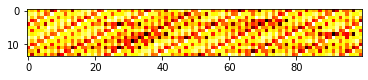

###############
###############
###############

Label is #[0. 1.]
Test sample #2


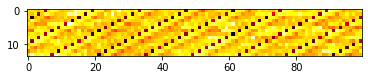

###############
###############
###############

Label is #[1. 0.]
Test sample #3


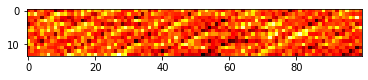

###############
###############
###############

Label is #[1. 0.]
Test sample #4


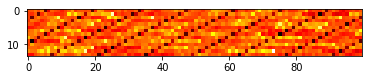

###############
###############
###############

Label is #[1. 0.]
Test sample #5


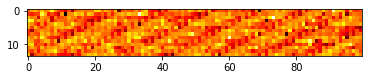

###############
###############
###############

Label is #[0. 1.]
Test sample #6


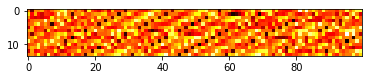

###############
###############
###############

Label is #[1. 0.]
Test sample #7


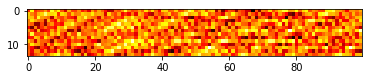

###############
###############
###############

Label is #[1. 0.]
Test sample #8


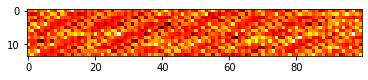

###############
###############
###############

Label is #[1. 0.]
Test sample #9


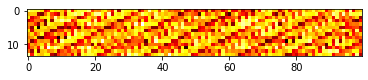

###############
###############
###############

Label is #[0. 1.]
Test sample #10


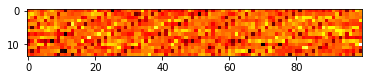

###############
###############
###############

Label is #[0. 1.]
Test sample #11


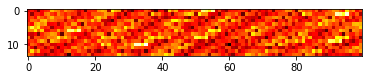

###############
###############
###############

Label is #[0. 1.]
Test sample #12


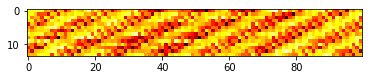

###############
###############
###############

Label is #[0. 1.]
Test sample #13


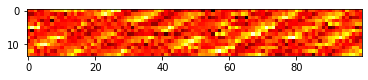

###############
###############
###############

Label is #[0. 1.]
Test sample #14


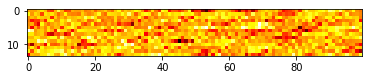

###############
###############
###############

Label is #[0. 1.]
Test sample #15


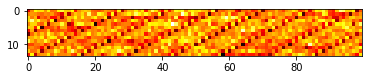

###############
###############
###############

Label is #[0. 1.]
Test sample #16


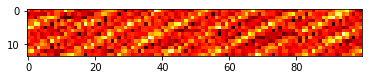

###############
###############
###############

Label is #[0. 1.]
Test sample #17


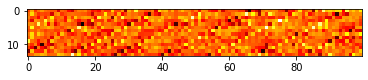

###############
###############
###############

Label is #[1. 0.]
Test sample #18


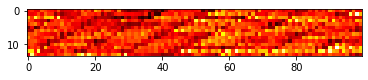

###############
###############
###############

Label is #[0. 1.]
Test sample #19


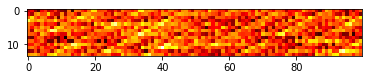

###############
###############
###############

Label is #[1. 0.]
Test sample #20


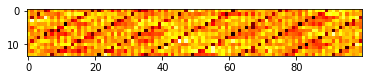

###############
###############
###############

Label is #[1. 0.]
Test sample #21


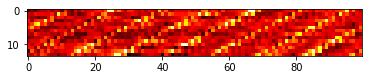

###############
###############
###############

Label is #[0. 1.]
Test sample #22


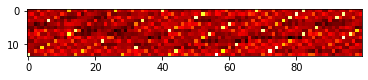

###############
###############
###############

Label is #[1. 0.]
Test sample #23


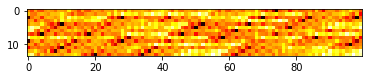

###############
###############
###############

Label is #[0. 1.]
Test sample #24


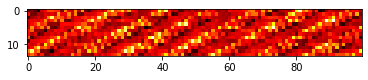

###############
###############
###############

Label is #[1. 0.]
Test sample #25


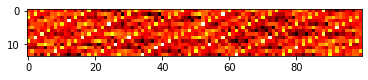

###############
###############
###############

Label is #[0. 1.]
Test sample #26


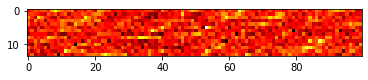

###############
###############
###############

Label is #[1. 0.]
Test sample #27


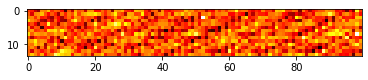

###############
###############
###############

Label is #[0. 1.]
Test sample #28


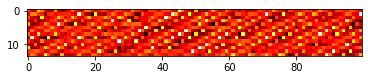

###############
###############
###############

Label is #[1. 0.]
Test sample #29


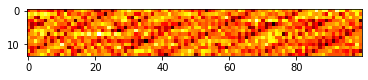

###############
###############
###############

Label is #[1. 0.]
Test sample #30


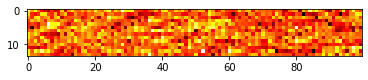

###############
###############
###############

Label is #[0. 1.]
Test sample #31


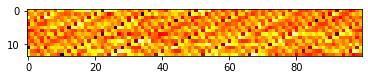

###############
###############
###############

Label is #[0. 1.]
Test sample #32


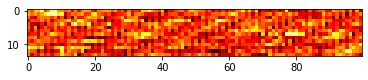

###############
###############
###############

Label is #[0. 1.]
Test sample #33


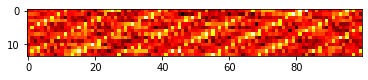

###############
###############
###############

Label is #[1. 0.]
Test sample #34


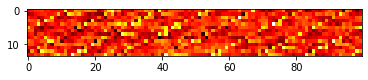

###############
###############
###############

Label is #[1. 0.]
Test sample #35


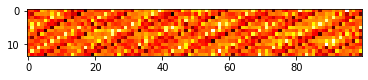

###############
###############
###############

Label is #[0. 1.]
Test sample #36


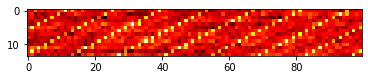

###############
###############
###############

Label is #[1. 0.]
Test sample #37


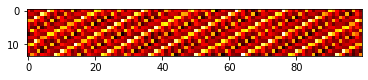

###############
###############
###############

Label is #[0. 1.]
Test sample #38


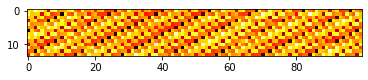

###############
###############
###############

Label is #[1. 0.]
Test sample #39


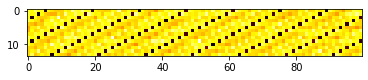

###############
###############
###############

Label is #[0. 1.]
Test sample #40


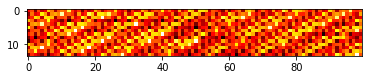

###############
###############
###############

Label is #[1. 0.]
Test sample #41


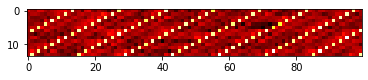

###############
###############
###############

Label is #[0. 1.]
Test sample #42


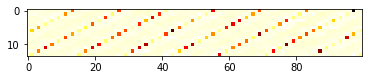

###############
###############
###############

Label is #[0. 1.]
Test sample #43


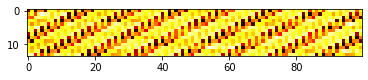

###############
###############
###############

Label is #[0. 1.]
Test sample #44


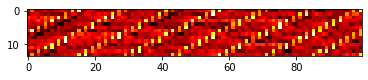

###############
###############
###############

Label is #[1. 0.]
Test sample #45


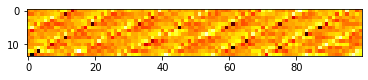

###############
###############
###############

Label is #[0. 1.]
Test sample #46


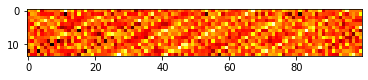

###############
###############
###############

Label is #[1. 0.]
Test sample #47


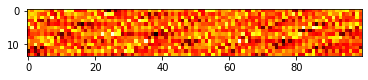

###############
###############
###############

Label is #[1. 0.]
Test sample #48


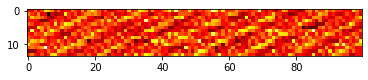

###############
###############
###############

Label is #[0. 1.]
Test sample #49


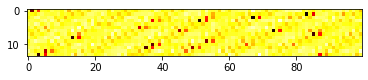

###############
###############
###############

Label is #[0. 1.]
Test sample #50


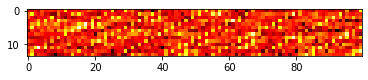

###############
###############
###############

Label is #[1. 0.]
Test sample #51


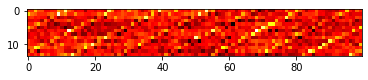

###############
###############
###############

Label is #[1. 0.]
Test sample #52


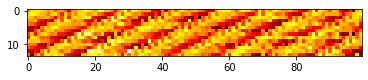

###############
###############
###############

Label is #[0. 1.]
Test sample #53


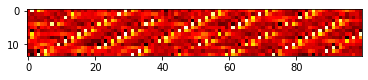

###############
###############
###############

Label is #[1. 0.]
Test sample #54


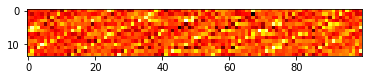

###############
###############
###############

Label is #[1. 0.]
Test sample #55


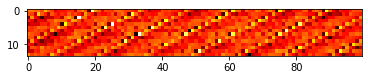

###############
###############
###############

Label is #[0. 1.]
Test sample #56


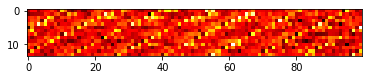

###############
###############
###############

Label is #[0. 1.]
Test sample #57


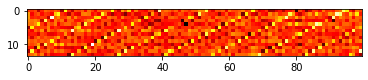

###############
###############
###############

Label is #[0. 1.]
Test sample #58


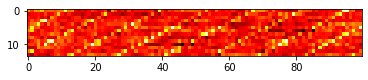

###############
###############
###############

Label is #[0. 1.]
Test sample #59


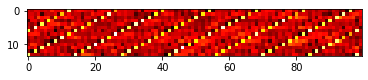

###############
###############
###############

Label is #[1. 0.]
Test sample #60


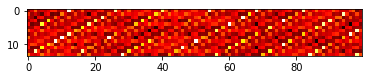

###############
###############
###############

Label is #[1. 0.]
Test sample #61


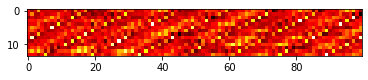

###############
###############
###############

Label is #[1. 0.]
Test sample #62


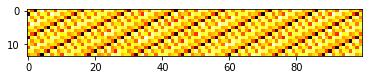

###############
###############
###############

Label is #[1. 0.]
Test sample #63


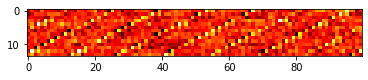

###############
###############
###############

Label is #[1. 0.]
Test sample #64


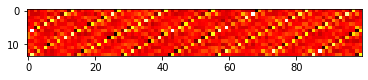

###############
###############
###############

Label is #[1. 0.]
Test sample #65


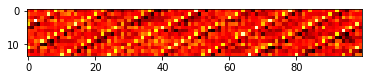

###############
###############
###############

Label is #[0. 1.]
Test sample #66


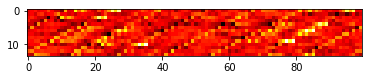

###############
###############
###############

Label is #[0. 1.]
Test sample #67


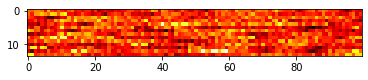

###############
###############
###############

Label is #[1. 0.]
Test sample #68


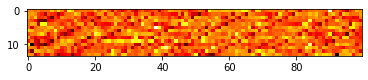

###############
###############
###############

Label is #[1. 0.]
Test sample #69


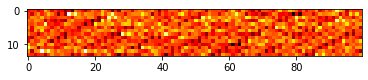

###############
###############
###############

Label is #[1. 0.]
Test sample #70


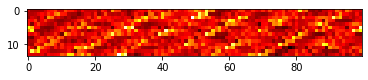

###############
###############
###############

Label is #[1. 0.]
Test sample #71


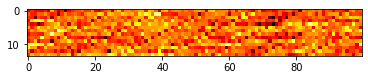

###############
###############
###############

Label is #[0. 1.]
Test sample #72


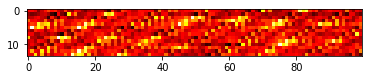

###############
###############
###############

Label is #[0. 1.]
Test sample #73


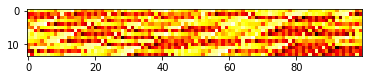

###############
###############
###############

Label is #[1. 0.]
Test sample #74


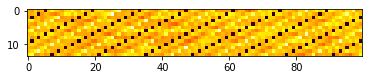

###############
###############
###############

Label is #[1. 0.]
Test sample #75


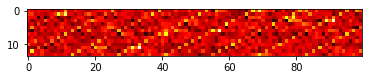

###############
###############
###############

Label is #[1. 0.]
Test sample #76


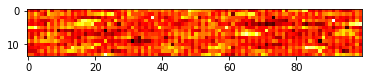

###############
###############
###############

Label is #[1. 0.]
Test sample #77


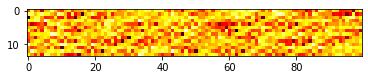

###############
###############
###############

Label is #[1. 0.]
Test sample #78


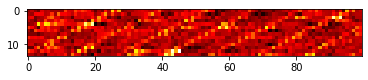

###############
###############
###############

Label is #[1. 0.]
Test sample #79


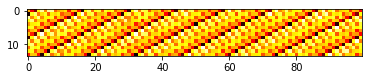

###############
###############
###############

Label is #[0. 1.]
Test sample #80


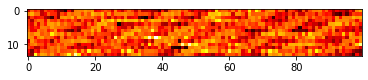

###############
###############
###############

Label is #[1. 0.]
Test sample #81


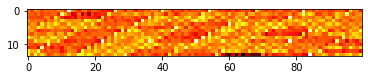

###############
###############
###############

Label is #[0. 1.]
Test sample #82


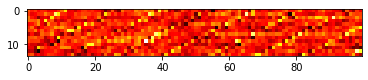

###############
###############
###############

Label is #[1. 0.]
Test sample #83


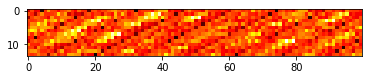

###############
###############
###############

Label is #[0. 1.]
Test sample #84


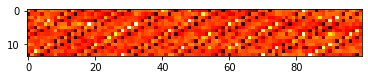

###############
###############
###############

Label is #[1. 0.]
Test sample #85


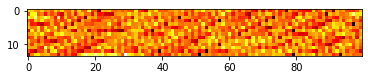

###############
###############
###############

Label is #[1. 0.]
Test sample #86


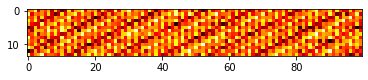

###############
###############
###############

Label is #[1. 0.]
Test sample #87


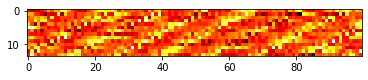

###############
###############
###############

Label is #[0. 1.]
Test sample #88


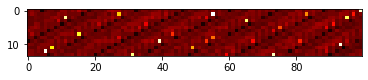

###############
###############
###############

Label is #[1. 0.]
Test sample #89


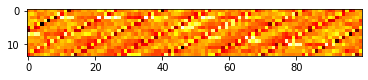

###############
###############
###############

Label is #[0. 1.]
Test sample #90


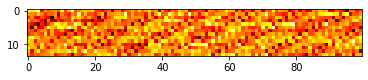

###############
###############
###############

Label is #[0. 1.]
Test sample #91


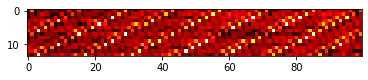

###############
###############
###############

Label is #[1. 0.]
Test sample #92


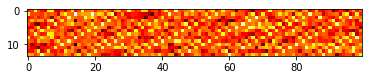

###############
###############
###############

Label is #[0. 1.]
Test sample #93


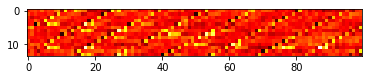

###############
###############
###############

Label is #[0. 1.]
Test sample #94


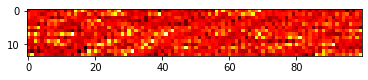

###############
###############
###############

Label is #[0. 1.]
Test sample #95


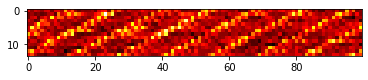

###############
###############
###############

Label is #[0. 1.]
Test sample #96


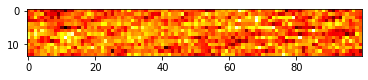

###############
###############
###############

Label is #[1. 0.]
Test sample #97


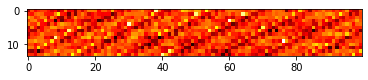

###############
###############
###############

Label is #[0. 1.]
Test sample #98


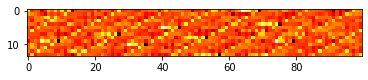

###############
###############
###############

Label is #[1. 0.]
Test sample #99


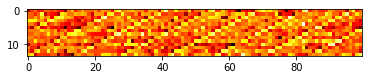

###############
###############
###############

Label is #[1. 0.]
Test sample #100


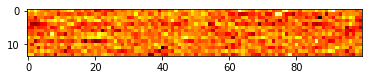

###############
###############
###############

Label is #[1. 0.]
Test sample #101


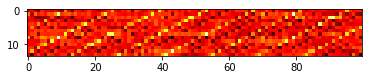

###############
###############
###############

Label is #[1. 0.]
Test sample #102


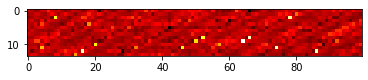

###############
###############
###############

Label is #[1. 0.]
Test sample #103


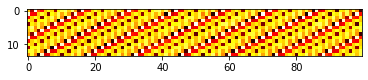

###############
###############
###############

Label is #[0. 1.]
Test sample #104


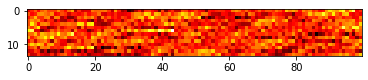

###############
###############
###############

Label is #[1. 0.]
Test sample #105


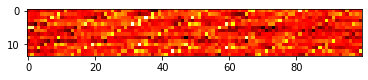

###############
###############
###############

Label is #[1. 0.]
Test sample #106


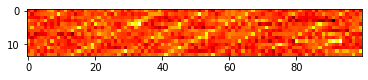

###############
###############
###############

Label is #[1. 0.]
Test sample #107


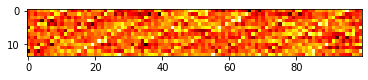

###############
###############
###############

Label is #[1. 0.]
Test sample #108


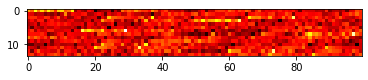

###############
###############
###############

Label is #[1. 0.]
Test sample #109


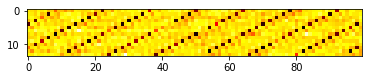

###############
###############
###############

Label is #[0. 1.]
Test sample #110


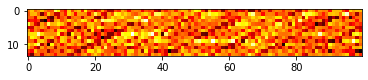

###############
###############
###############

Label is #[1. 0.]
Test sample #111


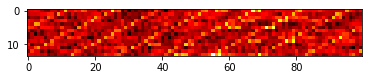

###############
###############
###############

Label is #[0. 1.]
Test sample #112


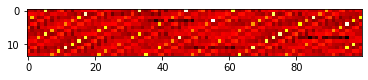

###############
###############
###############

Label is #[0. 1.]
Test sample #113


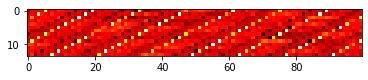

###############
###############
###############

Label is #[1. 0.]
Test sample #114


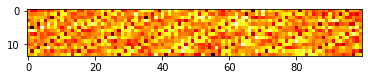

###############
###############
###############

Label is #[1. 0.]
Test sample #115


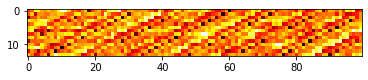

###############
###############
###############

Label is #[1. 0.]
Test sample #116


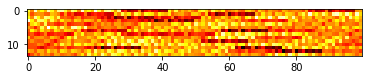

###############
###############
###############

Label is #[0. 1.]
Test sample #117


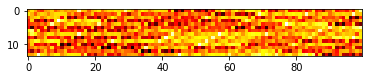

###############
###############
###############

Label is #[0. 1.]
Test sample #118


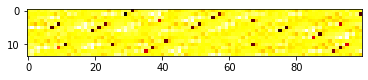

###############
###############
###############

Label is #[0. 1.]
Test sample #119


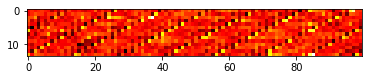

###############
###############
###############

Label is #[0. 1.]
Test sample #120


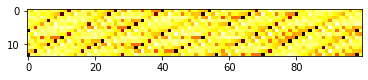

###############
###############
###############

Label is #[0. 1.]
Test sample #121


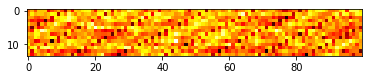

###############
###############
###############

Label is #[0. 1.]
Test sample #122


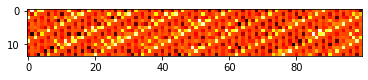

###############
###############
###############

Label is #[0. 1.]
Test sample #123


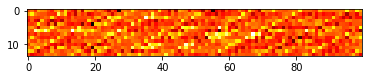

###############
###############
###############

Label is #[1. 0.]
Test sample #124


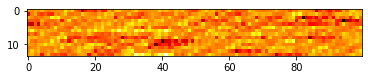

###############
###############
###############

Label is #[1. 0.]
Test sample #125


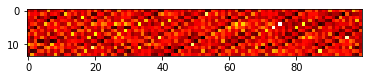

###############
###############
###############

Label is #[1. 0.]
Test sample #126


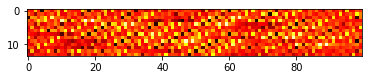

###############
###############
###############

Label is #[0. 1.]
Test sample #127


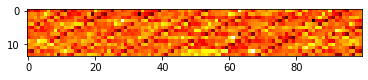

###############
###############
###############

Label is #[0. 1.]
Test sample #128


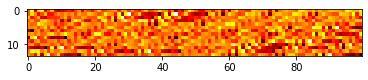

###############
###############
###############

Label is #[0. 1.]
Test sample #129


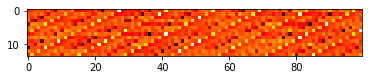

###############
###############
###############

Label is #[1. 0.]
Test sample #130


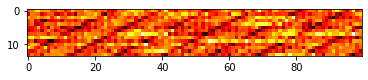

###############
###############
###############

Label is #[1. 0.]
Test sample #131


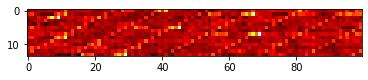

###############
###############
###############

Label is #[1. 0.]
Test sample #132


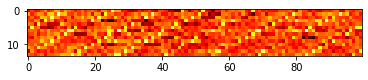

###############
###############
###############

Label is #[1. 0.]
Test sample #133


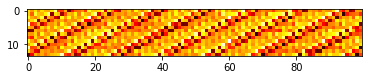

###############
###############
###############

Label is #[0. 1.]
Test sample #134


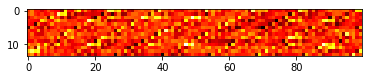

###############
###############
###############

Label is #[1. 0.]
Test sample #135


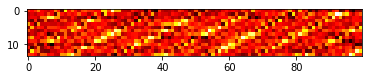

###############
###############
###############

Label is #[1. 0.]
Test sample #136


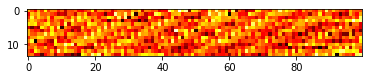

###############
###############
###############

Label is #[1. 0.]
Test sample #137


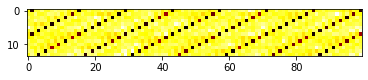

###############
###############
###############

Label is #[1. 0.]
Test sample #138


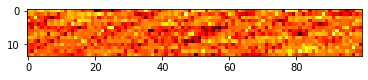

###############
###############
###############

Label is #[1. 0.]
Test sample #139


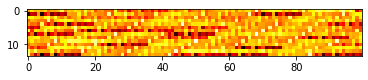

###############
###############
###############

Label is #[1. 0.]
Test sample #140


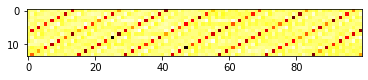

###############
###############
###############

Label is #[1. 0.]
Test sample #141


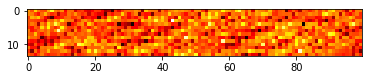

###############
###############
###############

Label is #[1. 0.]
Test sample #142


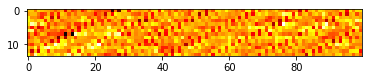

###############
###############
###############

Label is #[1. 0.]
Test sample #143


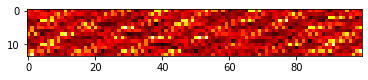

###############
###############
###############

Label is #[1. 0.]
Test sample #144


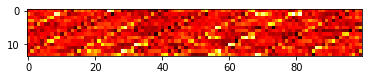

###############
###############
###############

Label is #[0. 1.]
Test sample #145


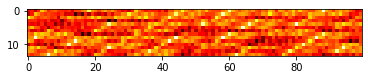

###############
###############
###############

Label is #[1. 0.]
Test sample #146


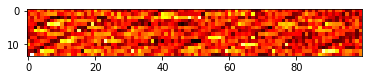

###############
###############
###############

Label is #[1. 0.]
Test sample #147


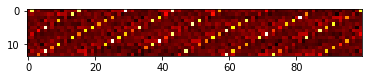

###############
###############
###############

Label is #[0. 1.]
Test sample #148


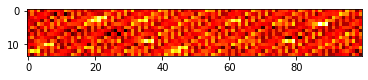

###############
###############
###############

Label is #[1. 0.]
Test sample #149


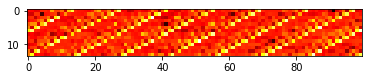

###############
###############
###############

Label is #[0. 1.]
Test sample #150


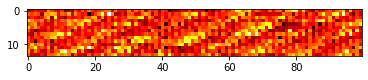

###############
###############
###############

Label is #[0. 1.]
Test sample #151


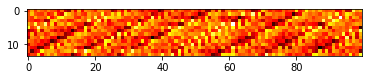

###############
###############
###############

Label is #[1. 0.]
Test sample #152


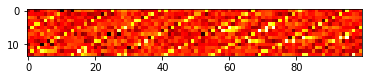

###############
###############
###############

Label is #[1. 0.]
Test sample #153


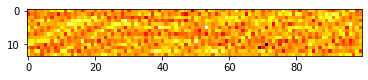

###############
###############
###############

Label is #[1. 0.]
Test sample #154


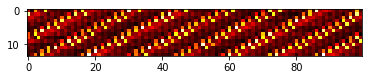

###############
###############
###############

Label is #[1. 0.]
Test sample #155


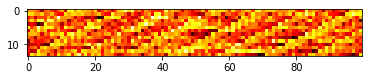

###############
###############
###############

Label is #[1. 0.]
Test sample #156


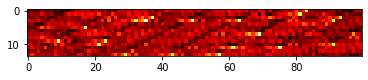

###############
###############
###############

Label is #[1. 0.]
Test sample #157


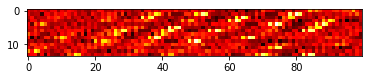

###############
###############
###############

Label is #[0. 1.]
Test sample #158


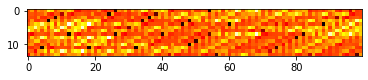

###############
###############
###############

Label is #[0. 1.]
Test sample #159


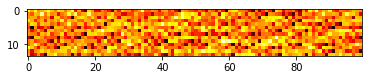

###############
###############
###############

Label is #[1. 0.]
Test sample #160


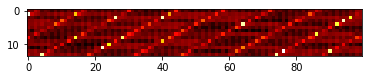

###############
###############
###############

Label is #[0. 1.]
Test sample #161


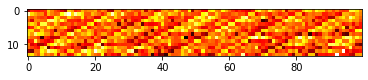

###############
###############
###############

Label is #[0. 1.]
Test sample #162


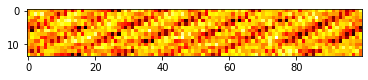

###############
###############
###############

Label is #[0. 1.]
Test sample #163


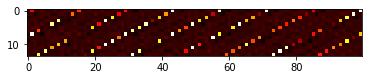

###############
###############
###############

Label is #[0. 1.]
Test sample #164


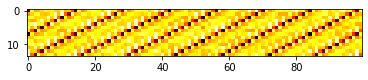

###############
###############
###############

Label is #[0. 1.]
Test sample #165


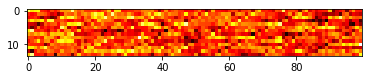

###############
###############
###############

Label is #[0. 1.]
Test sample #166


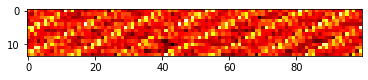

###############
###############
###############

Label is #[1. 0.]
Test sample #167


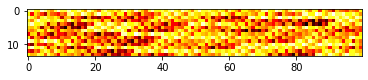

###############
###############
###############

Label is #[0. 1.]
Test sample #168


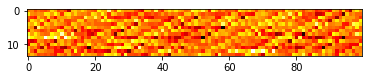

###############
###############
###############

Label is #[0. 1.]
Test sample #169


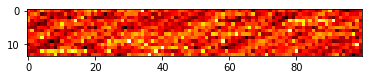

###############
###############
###############

Label is #[0. 1.]
Test sample #170


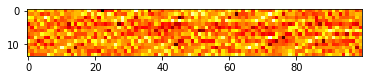

###############
###############
###############

Label is #[1. 0.]
Test sample #171


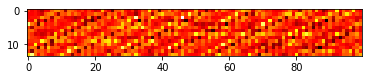

###############
###############
###############

Label is #[0. 1.]
Test sample #172


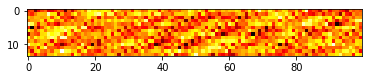

###############
###############
###############

Label is #[0. 1.]
Test sample #173


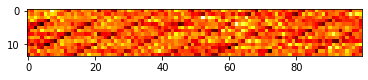

###############
###############
###############

Label is #[1. 0.]
Test sample #174


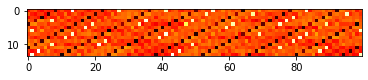

###############
###############
###############

Label is #[1. 0.]
Test sample #175


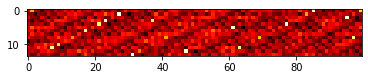

###############
###############
###############

Label is #[1. 0.]
Test sample #176


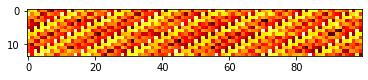

###############
###############
###############

Label is #[0. 1.]
Test sample #177


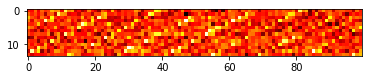

###############
###############
###############

Label is #[1. 0.]
Test sample #178


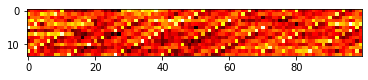

###############
###############
###############

Label is #[0. 1.]
Test sample #179


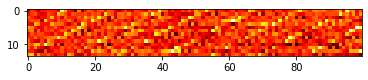

###############
###############
###############

Label is #[1. 0.]
Test sample #180


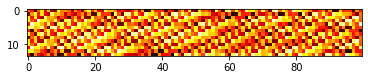

###############
###############
###############

Label is #[1. 0.]
Test sample #181


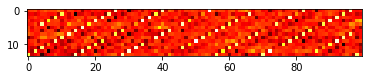

###############
###############
###############

Label is #[1. 0.]
Test sample #182


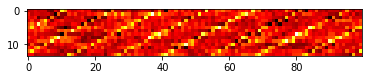

###############
###############
###############

Label is #[1. 0.]
Test sample #183


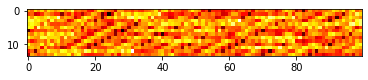

###############
###############
###############

Label is #[0. 1.]
Test sample #184


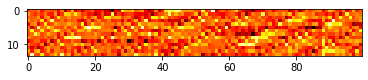

###############
###############
###############

Label is #[0. 1.]
Test sample #185


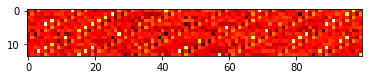

###############
###############
###############

Label is #[0. 1.]
Test sample #186


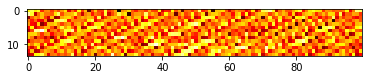

###############
###############
###############

Label is #[0. 1.]
Test sample #187


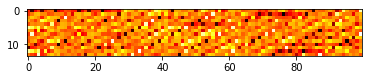

###############
###############
###############

Label is #[1. 0.]
Test sample #188


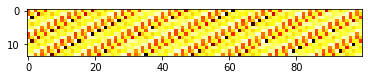

###############
###############
###############

Label is #[0. 1.]
Test sample #189


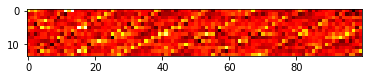

###############
###############
###############

Label is #[1. 0.]
Test sample #190


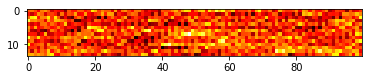

###############
###############
###############

Label is #[0. 1.]
Test sample #191


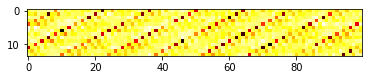

###############
###############
###############

Label is #[0. 1.]
Test sample #192


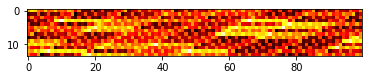

###############
###############
###############

Label is #[0. 1.]
Test sample #193


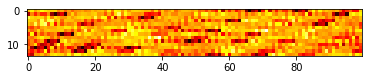

###############
###############
###############

Label is #[1. 0.]
Test sample #194


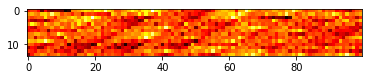

###############
###############
###############

Label is #[1. 0.]
Test sample #195


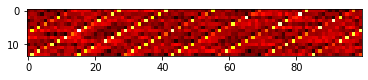

###############
###############
###############

Label is #[0. 1.]
Test sample #196


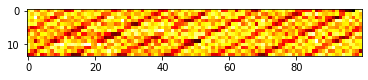

###############
###############
###############

Label is #[1. 0.]
Test sample #197


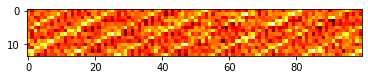

###############
###############
###############

Label is #[1. 0.]
Test sample #198


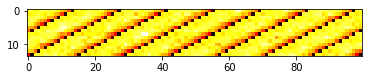

###############
###############
###############

Label is #[1. 0.]
Test sample #199


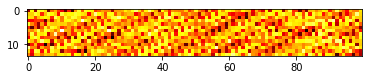

###############
###############
###############

Label is #[1. 0.]
Test sample #200


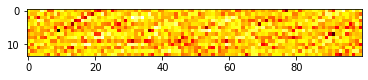

###############
###############
###############

Label is #[1. 0.]
Test sample #201


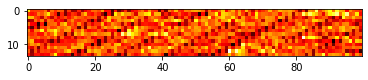

###############
###############
###############

Label is #[1. 0.]
Test sample #202


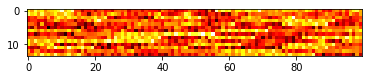

###############
###############
###############

Label is #[1. 0.]
Test sample #203


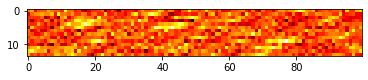

###############
###############
###############

Label is #[1. 0.]
Test sample #204


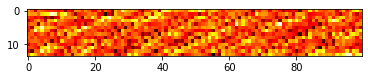

###############
###############
###############

Label is #[1. 0.]
Test sample #205


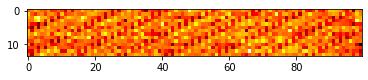

###############
###############
###############

Label is #[1. 0.]
Test sample #206


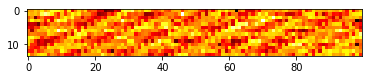

###############
###############
###############

Label is #[0. 1.]
Test sample #207


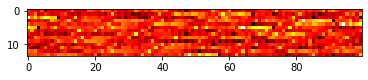

###############
###############
###############

Label is #[1. 0.]
Test sample #208


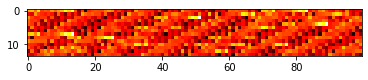

###############
###############
###############

Label is #[0. 1.]
Test sample #209


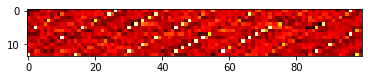

###############
###############
###############

Label is #[0. 1.]
Test sample #210


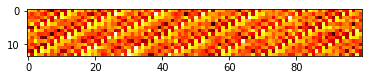

###############
###############
###############

Label is #[0. 1.]
Test sample #211


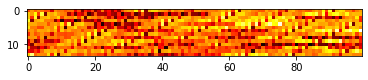

###############
###############
###############

Label is #[0. 1.]
Test sample #212


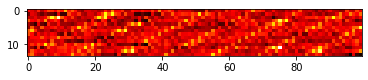

###############
###############
###############

Label is #[1. 0.]
Test sample #213


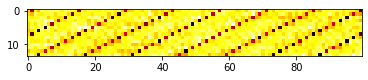

###############
###############
###############

Label is #[0. 1.]
Test sample #214


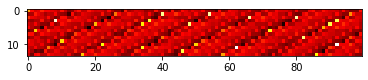

###############
###############
###############

Label is #[1. 0.]
Test sample #215


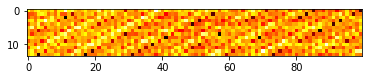

###############
###############
###############

Label is #[1. 0.]
Test sample #216


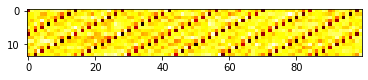

###############
###############
###############

Label is #[0. 1.]
Test sample #217


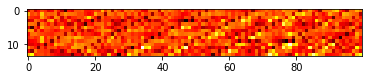

###############
###############
###############

Label is #[0. 1.]
Test sample #218


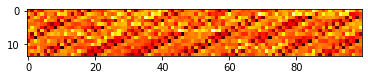

###############
###############
###############

Label is #[0. 1.]
Test sample #219


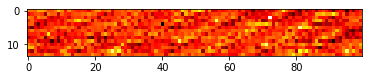

###############
###############
###############

Label is #[1. 0.]
Test sample #220


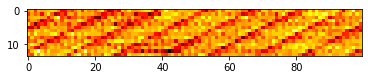

###############
###############
###############

Label is #[1. 0.]
Test sample #221


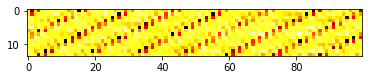

###############
###############
###############

Label is #[1. 0.]
Test sample #222


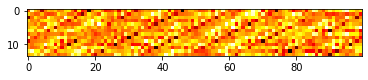

###############
###############
###############

Label is #[0. 1.]
Test sample #223


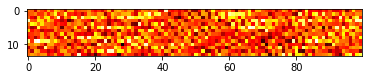

###############
###############
###############

Label is #[0. 1.]
Test sample #224


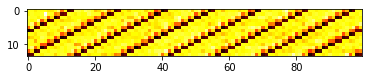

###############
###############
###############

Label is #[1. 0.]
Test sample #225


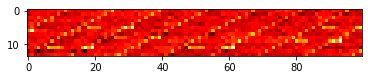

###############
###############
###############

Label is #[1. 0.]
Test sample #226


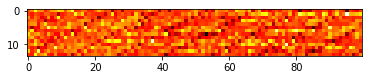

###############
###############
###############

Label is #[0. 1.]
Test sample #227


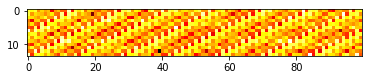

###############
###############
###############

Label is #[1. 0.]
Test sample #228


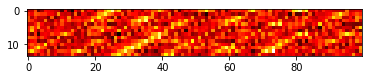

###############
###############
###############

Label is #[0. 1.]
Test sample #229


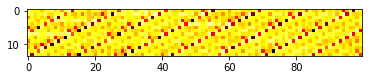

###############
###############
###############

Label is #[0. 1.]
Test sample #230


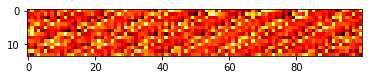

###############
###############
###############

Label is #[0. 1.]
Test sample #231


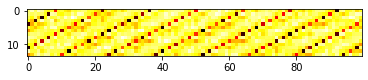

###############
###############
###############

Label is #[1. 0.]
Test sample #232


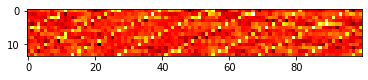

###############
###############
###############

Label is #[0. 1.]
Test sample #233


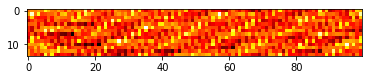

###############
###############
###############

Label is #[1. 0.]
Test sample #234


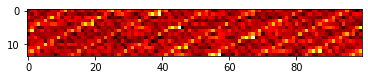

###############
###############
###############

Label is #[1. 0.]
Test sample #235


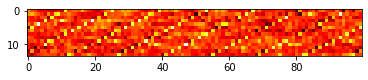

###############
###############
###############

Label is #[1. 0.]
Test sample #236


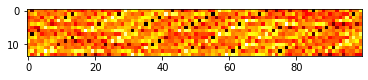

###############
###############
###############

Label is #[0. 1.]
Test sample #237


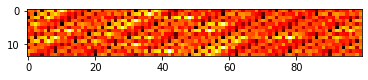

###############
###############
###############

Label is #[0. 1.]
Test sample #238


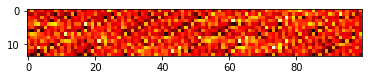

###############
###############
###############

Label is #[1. 0.]
Test sample #239


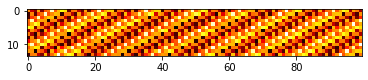

###############
###############
###############

Label is #[0. 1.]
Test sample #240


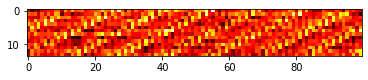

###############
###############
###############

Label is #[1. 0.]
Test sample #241


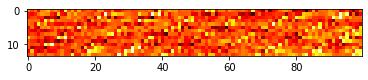

###############
###############
###############

Label is #[1. 0.]
Test sample #242


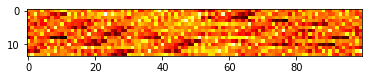

###############
###############
###############

Label is #[0. 1.]
Test sample #243


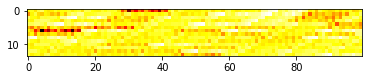

###############
###############
###############

Label is #[1. 0.]
Test sample #244


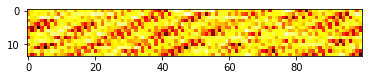

###############
###############
###############

Label is #[1. 0.]
Test sample #245


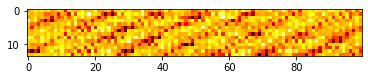

###############
###############
###############

Label is #[1. 0.]
Test sample #246


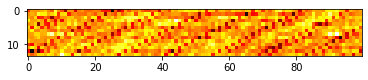

###############
###############
###############

Label is #[1. 0.]
Test sample #247


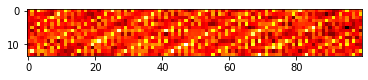

###############
###############
###############

Label is #[0. 1.]
Test sample #248


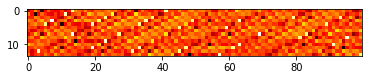

###############
###############
###############

Label is #[0. 1.]
Test sample #249


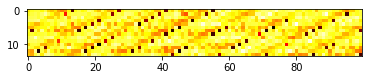

###############
###############
###############

Label is #[0. 1.]
Test sample #250


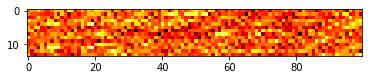

###############
###############
###############

Label is #[0. 1.]
Test sample #251


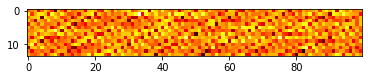

###############
###############
###############

Label is #[1. 0.]
Test sample #252


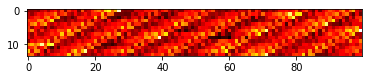

###############
###############
###############

Label is #[0. 1.]
Test sample #253


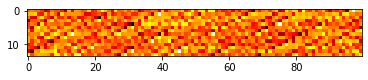

###############
###############
###############

Label is #[1. 0.]
Test sample #254


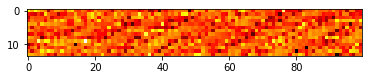

###############
###############
###############

Label is #[0. 1.]
Test sample #255


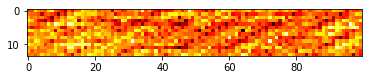

###############
###############
###############

Label is #[0. 1.]
Test sample #256


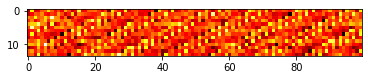

###############
###############
###############

Label is #[1. 0.]
Test sample #257


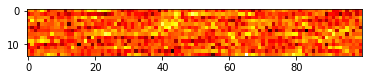

###############
###############
###############

Label is #[1. 0.]
Test sample #258


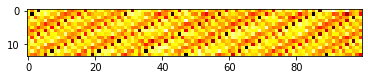

###############
###############
###############

Label is #[1. 0.]
Test sample #259


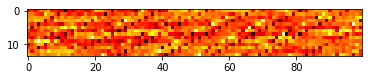

###############
###############
###############

Label is #[0. 1.]
Test sample #260


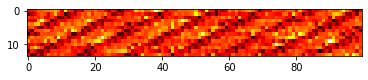

###############
###############
###############

Label is #[0. 1.]
Test sample #261


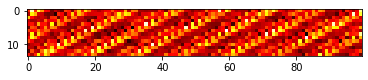

###############
###############
###############

Label is #[0. 1.]
Test sample #262


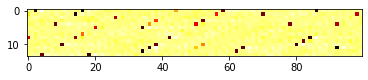

###############
###############
###############

Label is #[0. 1.]
Test sample #263


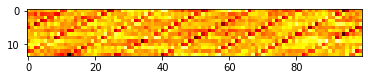

###############
###############
###############

Label is #[0. 1.]
Test sample #264


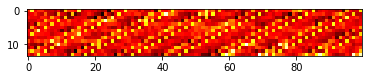

###############
###############
###############

Label is #[0. 1.]
Test sample #265


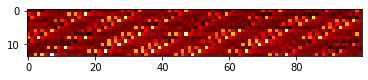

###############
###############
###############

Label is #[1. 0.]
Test sample #266


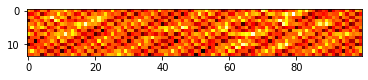

###############
###############
###############

Label is #[1. 0.]
Test sample #267


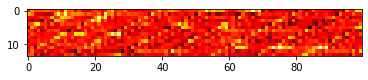

###############
###############
###############

Label is #[1. 0.]
Test sample #268


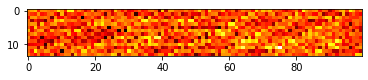

###############
###############
###############

Label is #[1. 0.]
Test sample #269


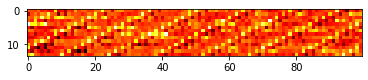

###############
###############
###############

Label is #[1. 0.]
Test sample #270


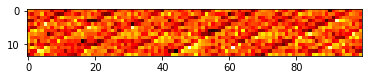

###############
###############
###############

Label is #[0. 1.]
Test sample #271


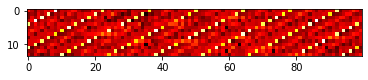

###############
###############
###############

Label is #[1. 0.]
Test sample #272


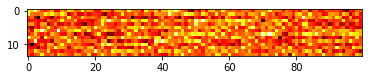

###############
###############
###############

Label is #[0. 1.]
Test sample #273


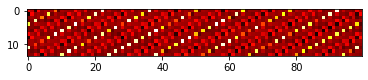

###############
###############
###############

Label is #[0. 1.]
Test sample #274


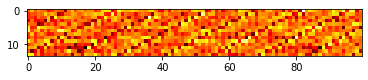

###############
###############
###############

Label is #[0. 1.]
Test sample #275


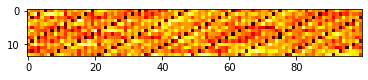

###############
###############
###############

Label is #[0. 1.]
Test sample #276


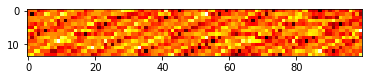

###############
###############
###############

Label is #[1. 0.]
Test sample #277


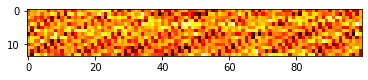

###############
###############
###############

Label is #[1. 0.]
Test sample #278


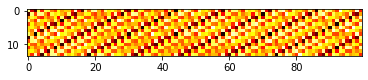

###############
###############
###############

Label is #[1. 0.]
Test sample #279


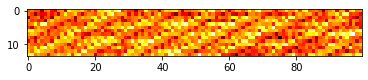

###############
###############
###############

Label is #[0. 1.]
Test sample #280


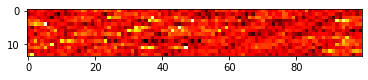

###############
###############
###############

Label is #[1. 0.]
Test sample #281


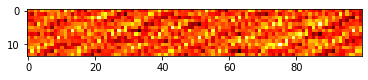

###############
###############
###############

Label is #[0. 1.]
Test sample #282


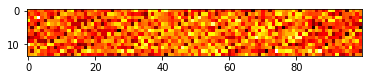

###############
###############
###############

Label is #[1. 0.]
Test sample #283


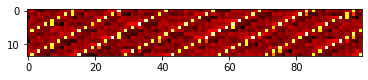

###############
###############
###############

Label is #[1. 0.]
Test sample #284


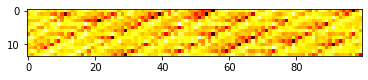

###############
###############
###############

Label is #[0. 1.]
Test sample #285


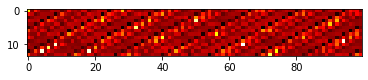

###############
###############
###############

Label is #[1. 0.]
Test sample #286


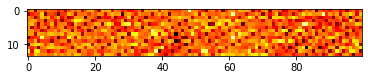

###############
###############
###############

Label is #[1. 0.]
Test sample #287


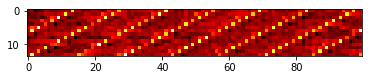

###############
###############
###############

Label is #[0. 1.]
Test sample #288


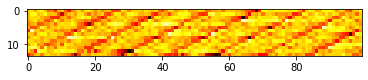

###############
###############
###############

Label is #[1. 0.]
Test sample #289


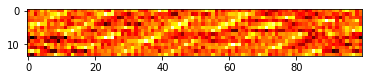

###############
###############
###############

Label is #[1. 0.]
Test sample #290


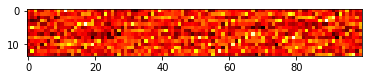

###############
###############
###############

Label is #[0. 1.]
Test sample #291


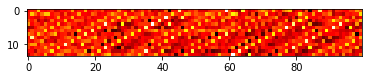

###############
###############
###############

Label is #[0. 1.]
Test sample #292


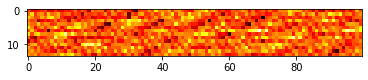

###############
###############
###############

Label is #[1. 0.]
Test sample #293


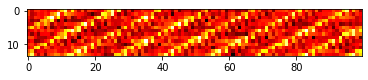

###############
###############
###############

Label is #[0. 1.]
Test sample #294


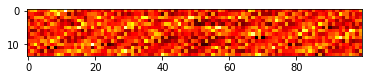

###############
###############
###############

Label is #[0. 1.]
Test sample #295


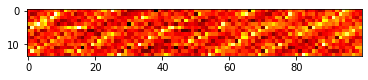

###############
###############
###############

Label is #[0. 1.]
Test sample #296


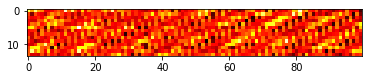

###############
###############
###############

Label is #[1. 0.]
Test sample #297


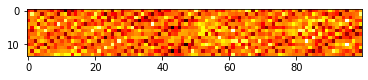

###############
###############
###############

Label is #[1. 0.]
Test sample #298


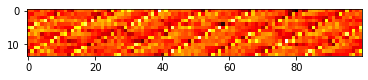

###############
###############
###############

Label is #[1. 0.]
Test sample #299


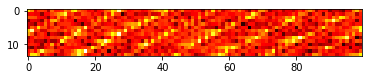

###############
###############
###############

Label is #[0. 1.]
Test sample #300


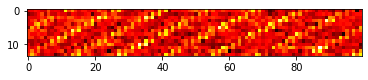

###############
###############
###############

Label is #[1. 0.]
Test sample #301


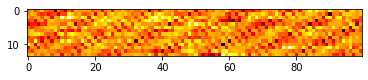

###############
###############
###############

Label is #[0. 1.]
Test sample #302


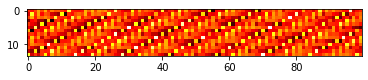

###############
###############
###############

Label is #[1. 0.]
Test sample #303


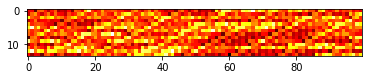

###############
###############
###############

Label is #[0. 1.]
Test sample #304


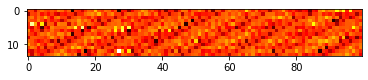

###############
###############
###############

Label is #[0. 1.]
Test sample #305


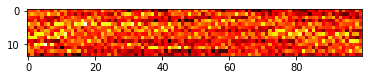

###############
###############
###############

Label is #[0. 1.]
Test sample #306


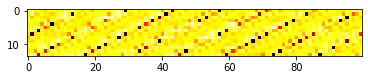

###############
###############
###############

Label is #[1. 0.]
Test sample #307


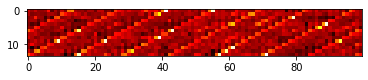

###############
###############
###############

Label is #[0. 1.]
Test sample #308


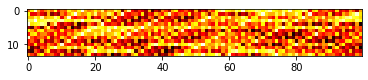

###############
###############
###############

Label is #[0. 1.]
Test sample #309


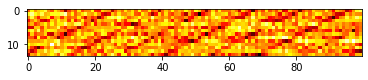

###############
###############
###############

Label is #[0. 1.]
Test sample #310


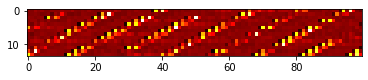

###############
###############
###############

Label is #[0. 1.]
Test sample #311


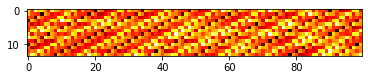

###############
###############
###############

Label is #[0. 1.]
Test sample #312


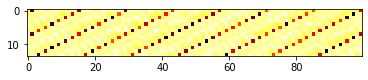

###############
###############
###############

Label is #[0. 1.]
Test sample #313


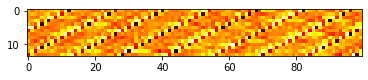

###############
###############
###############

Label is #[1. 0.]
Test sample #314


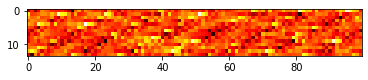

###############
###############
###############

Label is #[0. 1.]
Test sample #315


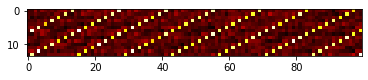

###############
###############
###############

Label is #[1. 0.]
Test sample #316


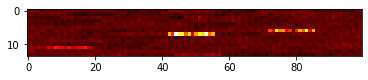

###############
###############
###############

Label is #[0. 1.]
Test sample #317


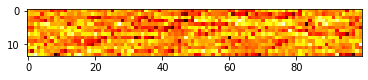

###############
###############
###############

Label is #[0. 1.]
Test sample #318


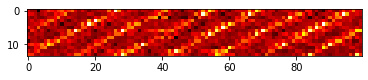

###############
###############
###############

Label is #[0. 1.]
Test sample #319


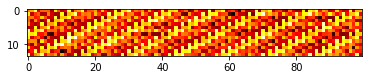

###############
###############
###############

Label is #[0. 1.]
Test sample #320


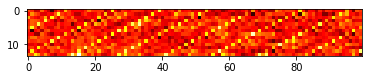

###############
###############
###############

Label is #[1. 0.]
Test sample #321


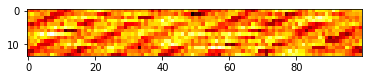

###############
###############
###############

Label is #[0. 1.]
Test sample #322


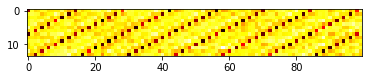

###############
###############
###############

Label is #[1. 0.]
Test sample #323


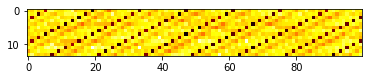

###############
###############
###############

Label is #[1. 0.]
Test sample #324


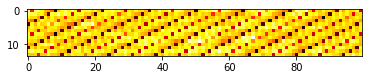

###############
###############
###############

Label is #[0. 1.]
Test sample #325


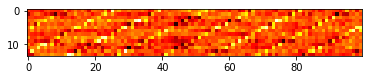

###############
###############
###############

Label is #[1. 0.]
Test sample #326


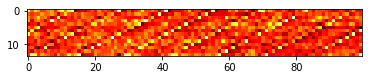

###############
###############
###############

Label is #[1. 0.]
Test sample #327


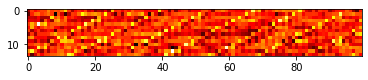

###############
###############
###############

Label is #[0. 1.]
Test sample #328


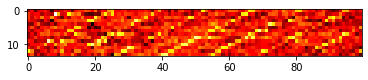

###############
###############
###############

Label is #[0. 1.]
Test sample #329


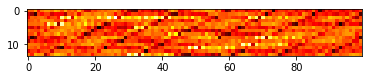

###############
###############
###############

Label is #[0. 1.]
Test sample #330


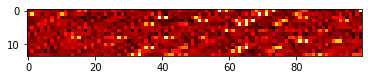

###############
###############
###############

Label is #[0. 1.]
Test sample #331


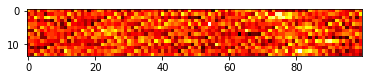

###############
###############
###############

Label is #[0. 1.]
Test sample #332


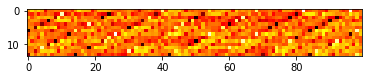

###############
###############
###############

Label is #[1. 0.]
Test sample #333


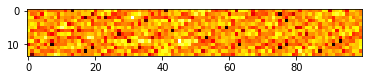

###############
###############
###############

Label is #[0. 1.]
Test sample #334


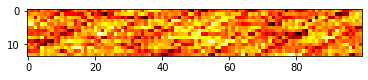

###############
###############
###############

Label is #[0. 1.]
Test sample #335


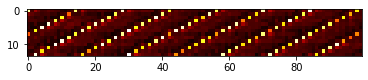

###############
###############
###############

Label is #[0. 1.]
Test sample #336


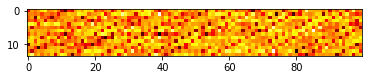

###############
###############
###############

Label is #[1. 0.]
Test sample #337


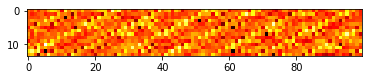

###############
###############
###############

Label is #[1. 0.]
Test sample #338


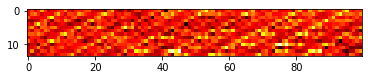

###############
###############
###############

Label is #[1. 0.]
Test sample #339


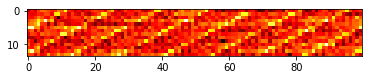

###############
###############
###############

Label is #[1. 0.]
Test sample #340


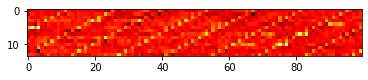

###############
###############
###############

Label is #[0. 1.]
Test sample #341


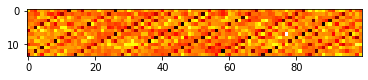

###############
###############
###############

Label is #[0. 1.]
Test sample #342


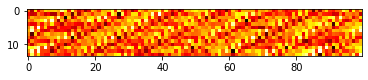

###############
###############
###############

Label is #[1. 0.]
Test sample #343


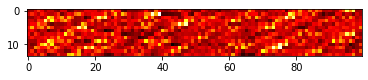

###############
###############
###############

Label is #[1. 0.]
Test sample #344


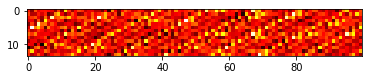

###############
###############
###############

Label is #[0. 1.]
Test sample #345


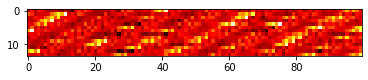

###############
###############
###############

Label is #[1. 0.]
Test sample #346


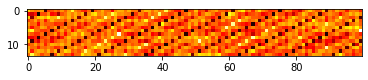

###############
###############
###############

Label is #[0. 1.]
Test sample #347


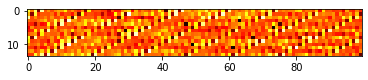

###############
###############
###############

Label is #[1. 0.]
Test sample #348


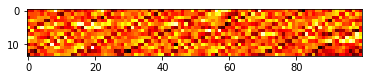

###############
###############
###############

Label is #[1. 0.]
Test sample #349


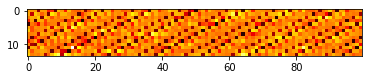

###############
###############
###############

Label is #[0. 1.]
Test sample #350


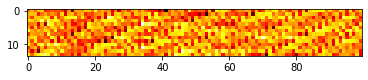

###############
###############
###############

Label is #[0. 1.]
Test sample #351


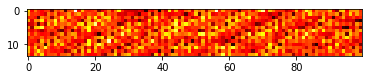

###############
###############
###############

Label is #[1. 0.]
Test sample #352


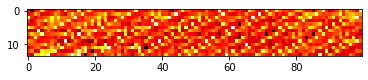

###############
###############
###############

Label is #[1. 0.]
Test sample #353


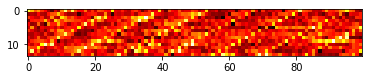

###############
###############
###############

Label is #[1. 0.]
Test sample #354


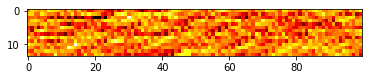

###############
###############
###############

Label is #[0. 1.]
Test sample #355


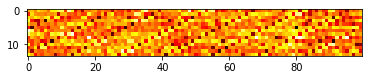

###############
###############
###############

Label is #[1. 0.]
Test sample #356


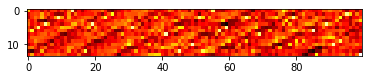

###############
###############
###############

Label is #[0. 1.]
Test sample #357


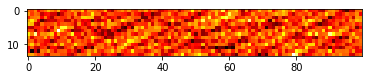

###############
###############
###############

Label is #[1. 0.]
Test sample #358


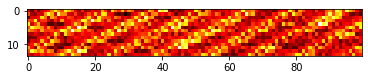

###############
###############
###############

Label is #[0. 1.]
Test sample #359


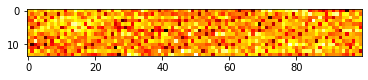

###############
###############
###############

Label is #[0. 1.]
Test sample #360


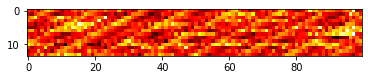

###############
###############
###############

Label is #[1. 0.]
Test sample #361


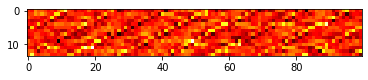

###############
###############
###############

Label is #[1. 0.]
Test sample #362


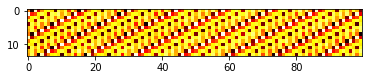

###############
###############
###############

Label is #[0. 1.]
Test sample #363


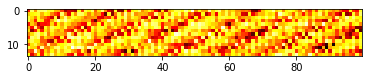

###############
###############
###############

Label is #[0. 1.]
Test sample #364


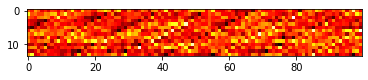

###############
###############
###############

Label is #[0. 1.]
Test sample #365


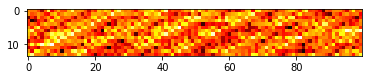

###############
###############
###############

Label is #[0. 1.]
Test sample #366


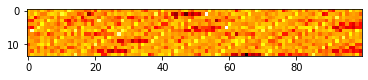

###############
###############
###############

Label is #[0. 1.]
Test sample #367


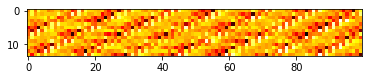

###############
###############
###############

Label is #[0. 1.]
Test sample #368


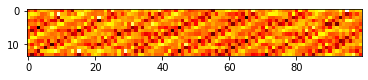

###############
###############
###############

Label is #[0. 1.]
Test sample #369


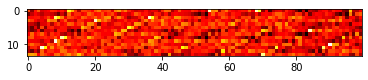

###############
###############
###############

Label is #[1. 0.]
Test sample #370


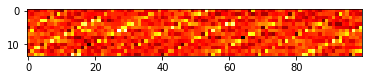

###############
###############
###############

Label is #[0. 1.]
Test sample #371


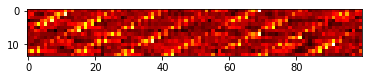

###############
###############
###############

Label is #[0. 1.]
Test sample #372


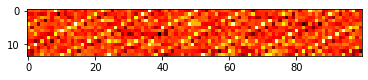

###############
###############
###############

Label is #[1. 0.]
Test sample #373


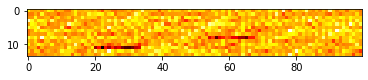

###############
###############
###############

Label is #[0. 1.]
Test sample #374


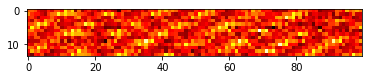

###############
###############
###############

Label is #[1. 0.]
Test sample #375


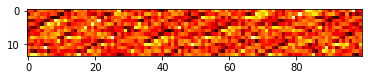

###############
###############
###############

Label is #[1. 0.]
Test sample #376


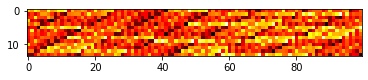

###############
###############
###############

Label is #[0. 1.]
Test sample #377


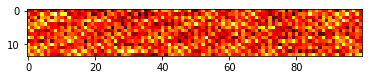

###############
###############
###############

Label is #[1. 0.]
Test sample #378


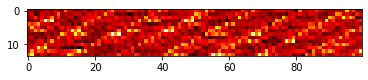

###############
###############
###############

Label is #[1. 0.]
Test sample #379


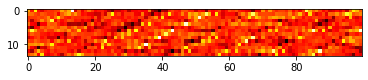

###############
###############
###############

Label is #[1. 0.]
Test sample #380


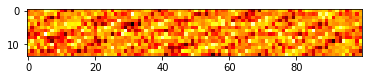

###############
###############
###############

Label is #[1. 0.]
Test sample #381


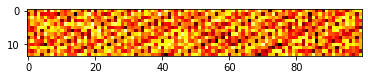

###############
###############
###############

Label is #[0. 1.]
Test sample #382


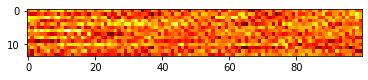

###############
###############
###############

Label is #[0. 1.]
Test sample #383


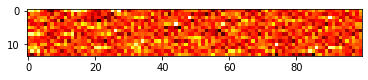

###############
###############
###############

Label is #[0. 1.]
Test sample #384


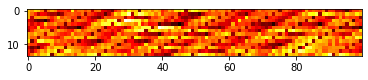

###############
###############
###############

Label is #[1. 0.]
Test sample #385


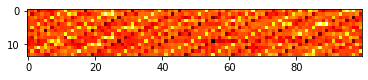

###############
###############
###############

Label is #[1. 0.]
Test sample #386


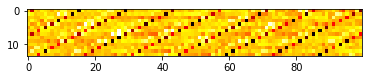

###############
###############
###############

Label is #[0. 1.]
Test sample #387


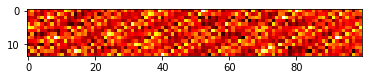

###############
###############
###############

Label is #[1. 0.]
Test sample #388


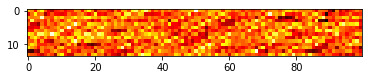

###############
###############
###############

Label is #[0. 1.]
Test sample #389


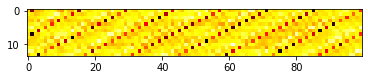

###############
###############
###############

Label is #[1. 0.]
Test sample #390


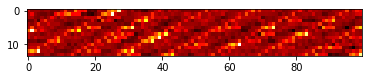

###############
###############
###############

Label is #[1. 0.]
Test sample #391


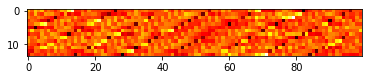

###############
###############
###############

Label is #[0. 1.]
Test sample #392


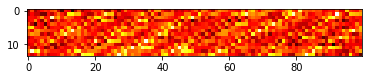

###############
###############
###############

Label is #[1. 0.]
Test sample #393


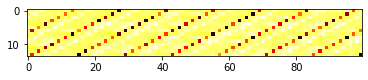

###############
###############
###############

Label is #[0. 1.]
Test sample #394


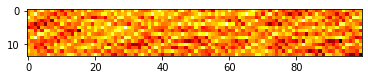

###############
###############
###############

Label is #[1. 0.]
Test sample #395


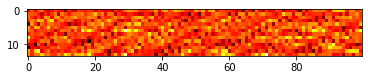

###############
###############
###############

Label is #[1. 0.]
Test sample #396


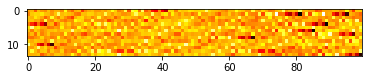

###############
###############
###############

Label is #[0. 1.]
Test sample #397


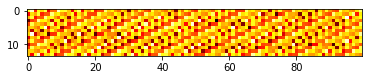

###############
###############
###############

Label is #[1. 0.]
Test sample #398


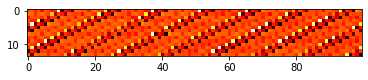

###############
###############
###############

Label is #[1. 0.]
Test sample #399


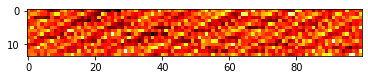

###############
###############
###############

Label is #[1. 0.]
Test sample #400


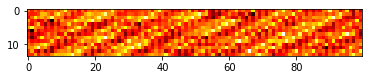

###############
###############
###############

Label is #[1. 0.]
Test sample #401


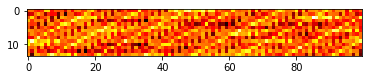

###############
###############
###############

Label is #[0. 1.]
Test sample #402


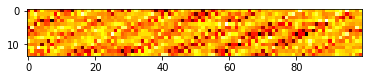

###############
###############
###############

Label is #[0. 1.]
Test sample #403


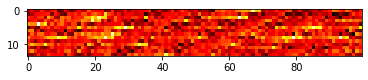

###############
###############
###############

Label is #[1. 0.]
Test sample #404


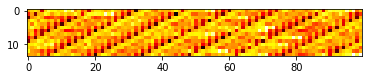

###############
###############
###############

Label is #[0. 1.]
Test sample #405


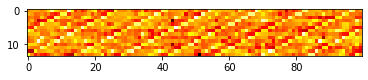

###############
###############
###############

Label is #[1. 0.]
Test sample #406


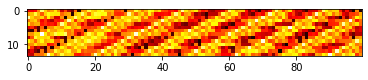

###############
###############
###############

Label is #[1. 0.]
Test sample #407


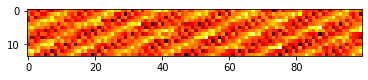

###############
###############
###############

Label is #[1. 0.]
Test sample #408


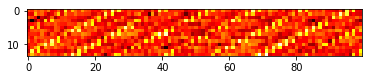

###############
###############
###############

Label is #[0. 1.]
Test sample #409


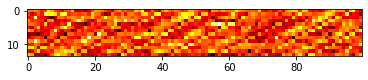

###############
###############
###############

Label is #[0. 1.]
Test sample #410


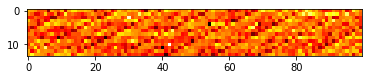

###############
###############
###############

Label is #[1. 0.]
Test sample #411


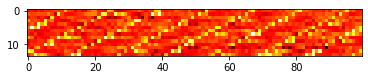

###############
###############
###############

Label is #[1. 0.]
Test sample #412


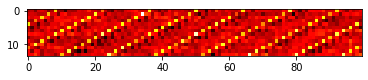

###############
###############
###############

Label is #[0. 1.]
Test sample #413


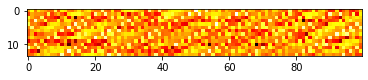

###############
###############
###############

Label is #[0. 1.]
Test sample #414


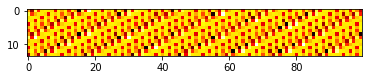

###############
###############
###############

Label is #[1. 0.]
Test sample #415


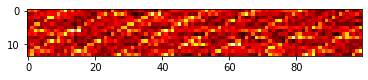

###############
###############
###############

Label is #[0. 1.]
Test sample #416


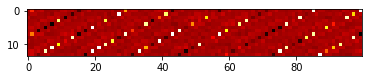

###############
###############
###############

Label is #[0. 1.]
Test sample #417


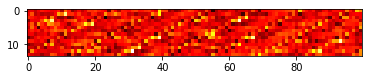

###############
###############
###############

Label is #[0. 1.]
Test sample #418


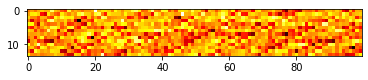

###############
###############
###############

Label is #[0. 1.]
Test sample #419


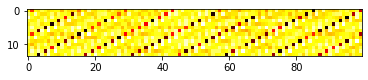

###############
###############
###############

Label is #[0. 1.]
Test sample #420


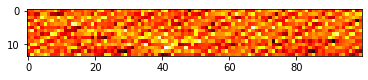

###############
###############
###############

Label is #[1. 0.]
Test sample #421


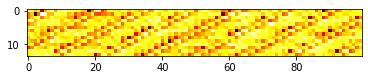

###############
###############
###############

Label is #[0. 1.]
Test sample #422


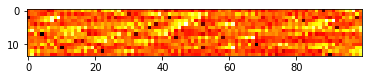

###############
###############
###############

Label is #[0. 1.]
Test sample #423


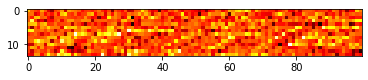

###############
###############
###############

Label is #[0. 1.]
Test sample #424


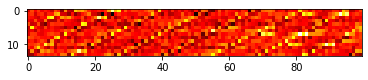

###############
###############
###############

Label is #[0. 1.]
Test sample #425


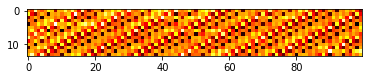

###############
###############
###############

Label is #[0. 1.]
Test sample #426


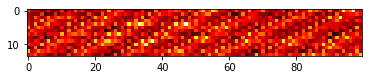

###############
###############
###############

Label is #[1. 0.]
Test sample #427


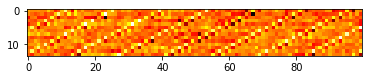

###############
###############
###############

Label is #[1. 0.]
Test sample #428


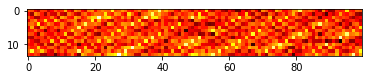

###############
###############
###############

Label is #[1. 0.]
Test sample #429


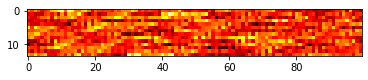

###############
###############
###############

Label is #[1. 0.]
Test sample #430


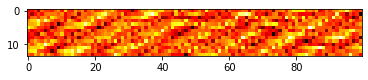

###############
###############
###############

Label is #[0. 1.]
Test sample #431


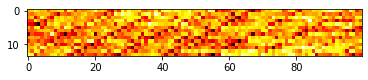

###############
###############
###############

Label is #[0. 1.]
Test sample #432


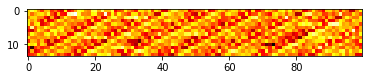

###############
###############
###############

Label is #[1. 0.]
Test sample #433


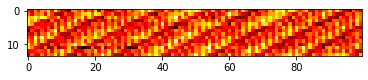

###############
###############
###############

Label is #[1. 0.]
Test sample #434


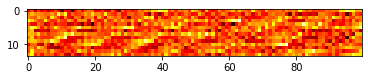

###############
###############
###############

Label is #[0. 1.]
Test sample #435


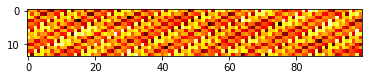

###############
###############
###############

Label is #[1. 0.]
Test sample #436


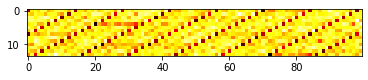

###############
###############
###############

Label is #[0. 1.]
Test sample #437


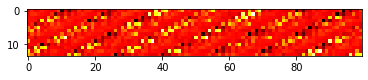

###############
###############
###############

Label is #[0. 1.]
Test sample #438


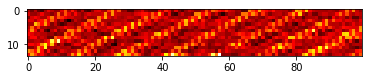

###############
###############
###############

Label is #[0. 1.]
Test sample #439


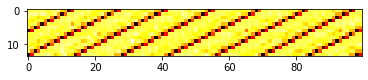

###############
###############
###############

Label is #[0. 1.]
Test sample #440


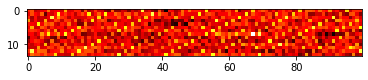

###############
###############
###############

Label is #[0. 1.]
Test sample #441


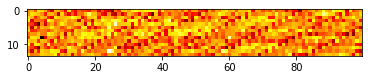

###############
###############
###############

Label is #[1. 0.]
Test sample #442


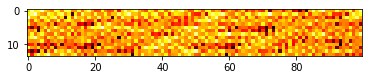

###############
###############
###############

Label is #[1. 0.]
Test sample #443


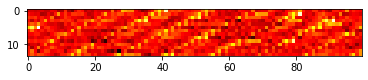

###############
###############
###############

Label is #[0. 1.]
Test sample #444


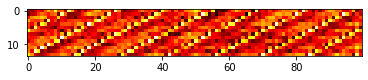

###############
###############
###############

Label is #[1. 0.]
Test sample #445


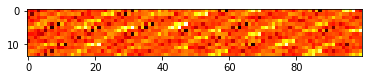

###############
###############
###############

Label is #[0. 1.]
Test sample #446


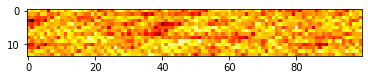

###############
###############
###############

Label is #[1. 0.]
Test sample #447


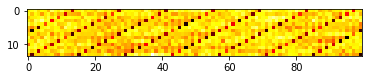

###############
###############
###############

Label is #[0. 1.]
Test sample #448


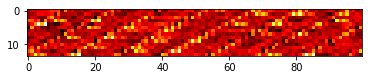

###############
###############
###############

Label is #[0. 1.]
Test sample #449


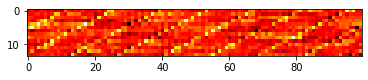

###############
###############
###############

Label is #[1. 0.]
Test sample #450


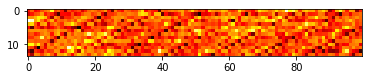

###############
###############
###############

Label is #[0. 1.]
Test sample #451


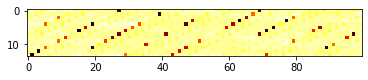

###############
###############
###############

Label is #[1. 0.]
Test sample #452


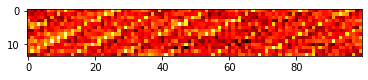

###############
###############
###############

Label is #[0. 1.]
Test sample #453


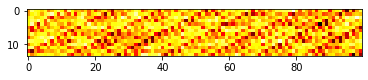

###############
###############
###############

Label is #[0. 1.]
Test sample #454


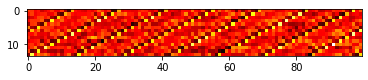

###############
###############
###############

Label is #[0. 1.]
Test sample #455


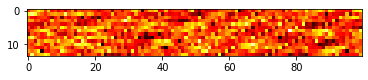

###############
###############
###############

Label is #[1. 0.]
Test sample #456


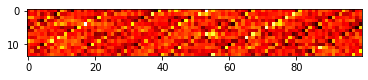

###############
###############
###############

Label is #[1. 0.]
Test sample #457


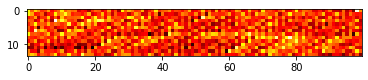

###############
###############
###############

Label is #[0. 1.]
Test sample #458


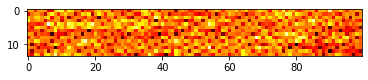

###############
###############
###############

Label is #[1. 0.]
Test sample #459


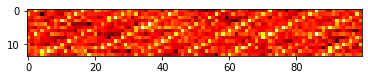

###############
###############
###############

Label is #[1. 0.]
Test sample #460


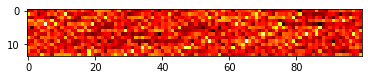

###############
###############
###############

Label is #[0. 1.]
Test sample #461


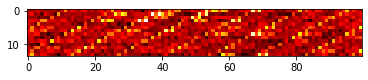

###############
###############
###############

Label is #[1. 0.]
Test sample #462


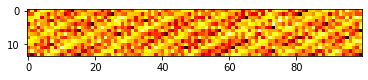

###############
###############
###############

Label is #[0. 1.]
Test sample #463


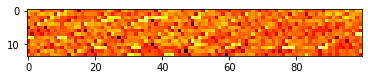

###############
###############
###############

Label is #[0. 1.]
Test sample #464


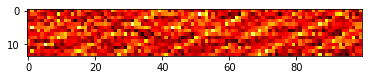

###############
###############
###############

Label is #[1. 0.]
Test sample #465


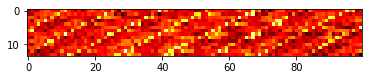

###############
###############
###############

Label is #[1. 0.]
Test sample #466


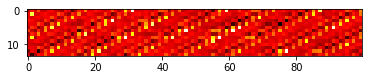

###############
###############
###############

Label is #[1. 0.]
Test sample #467


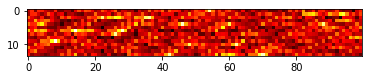

###############
###############
###############

Label is #[0. 1.]
Test sample #468


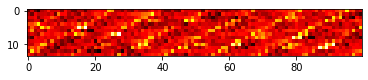

###############
###############
###############

Label is #[1. 0.]
Test sample #469


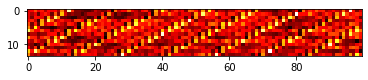

###############
###############
###############

Label is #[0. 1.]
Test sample #470


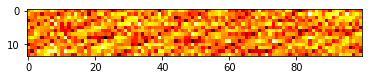

###############
###############
###############

Label is #[1. 0.]
Test sample #471


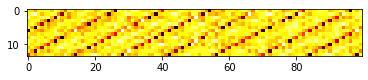

###############
###############
###############

Label is #[0. 1.]
Test sample #472


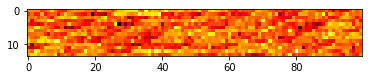

###############
###############
###############

Label is #[0. 1.]
Test sample #473


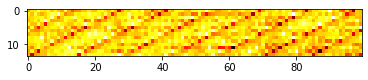

###############
###############
###############

Label is #[0. 1.]
Test sample #474


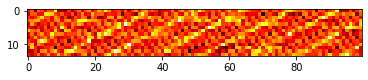

###############
###############
###############

Label is #[1. 0.]
Test sample #475


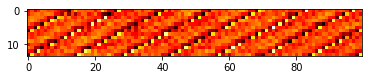

###############
###############
###############

Label is #[0. 1.]
Test sample #476


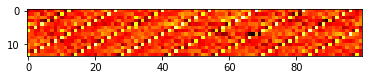

###############
###############
###############

Label is #[1. 0.]
Test sample #477


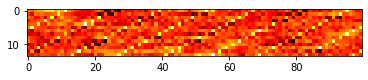

###############
###############
###############

Label is #[0. 1.]
Test sample #478


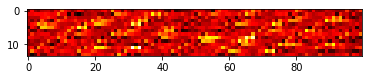

###############
###############
###############

Label is #[1. 0.]
Test sample #479


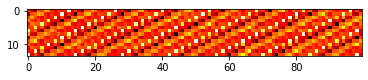

###############
###############
###############

Label is #[1. 0.]
Test sample #480


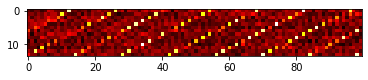

###############
###############
###############

Label is #[1. 0.]
Test sample #481


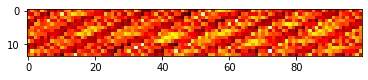

###############
###############
###############

Label is #[0. 1.]
Test sample #482


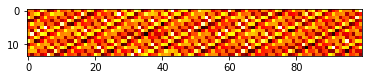

###############
###############
###############

Label is #[1. 0.]
Test sample #483


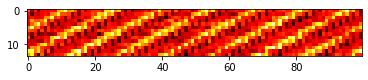

###############
###############
###############

Label is #[0. 1.]
Test sample #484


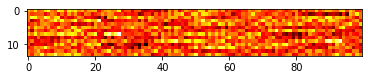

###############
###############
###############

Label is #[0. 1.]
Test sample #485


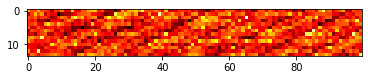

###############
###############
###############

Label is #[1. 0.]
Test sample #486


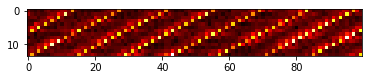

###############
###############
###############

Label is #[0. 1.]
Test sample #487


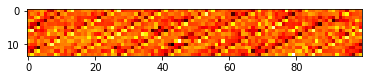

###############
###############
###############

Label is #[0. 1.]
Test sample #488


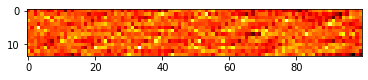

###############
###############
###############

Label is #[0. 1.]
Test sample #489


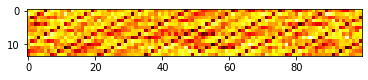

###############
###############
###############

Label is #[1. 0.]
Test sample #490


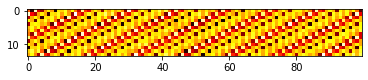

###############
###############
###############

Label is #[0. 1.]
Test sample #491


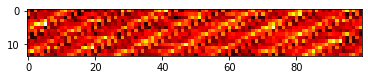

###############
###############
###############

Label is #[1. 0.]
Test sample #492


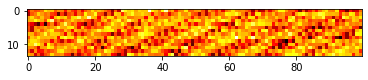

###############
###############
###############

Label is #[0. 1.]
Test sample #493


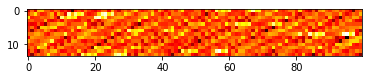

###############
###############
###############

Label is #[1. 0.]
Test sample #494


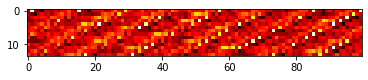

###############
###############
###############

Label is #[0. 1.]
Test sample #495


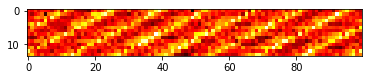

###############
###############
###############

Label is #[1. 0.]
Test sample #496


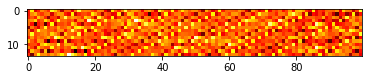

###############
###############
###############

Label is #[1. 0.]
Test sample #497


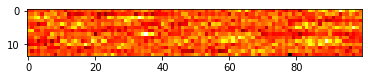

###############
###############
###############

Label is #[0. 1.]
Test sample #498


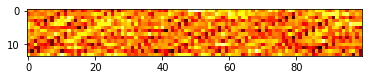

###############
###############
###############

Label is #[1. 0.]
Test sample #499


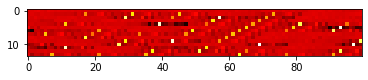

###############
###############
###############

Label is #[1. 0.]
Test sample #500


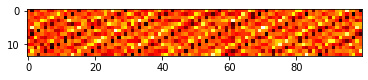

###############
###############
###############

Label is #[1. 0.]
Test sample #501


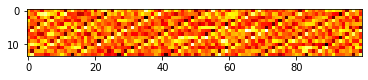

###############
###############
###############

Label is #[0. 1.]
Test sample #502


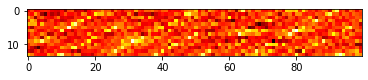

###############
###############
###############

Label is #[1. 0.]
Test sample #503


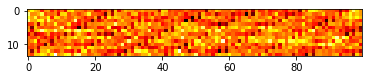

###############
###############
###############

Label is #[1. 0.]
Test sample #504


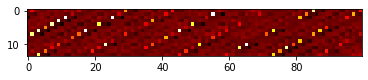

###############
###############
###############

Label is #[1. 0.]
Test sample #505


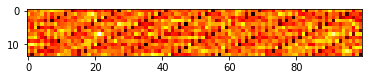

###############
###############
###############

Label is #[0. 1.]
Test sample #506


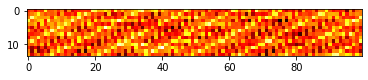

###############
###############
###############

Label is #[1. 0.]
Test sample #507


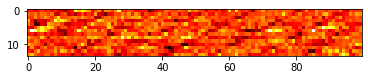

###############
###############
###############

Label is #[0. 1.]
Test sample #508


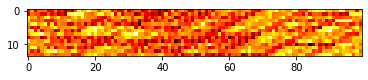

###############
###############
###############

Label is #[1. 0.]
Test sample #509


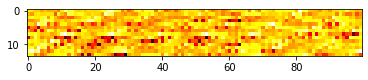

###############
###############
###############

Label is #[0. 1.]
Test sample #510


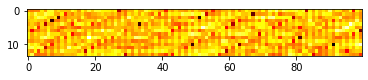

###############
###############
###############

Label is #[1. 0.]
Test sample #511


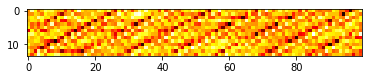

###############
###############
###############

Label is #[0. 1.]
Test sample #512


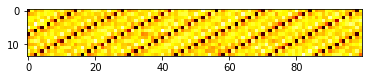

###############
###############
###############

Label is #[0. 1.]
Test sample #513


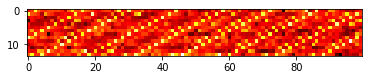

###############
###############
###############

Label is #[0. 1.]
Test sample #514


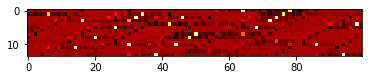

###############
###############
###############

Label is #[1. 0.]
Test sample #515


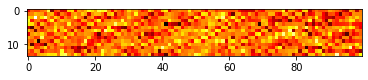

###############
###############
###############

Label is #[0. 1.]
Test sample #516


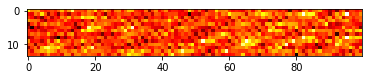

###############
###############
###############

Label is #[0. 1.]
Test sample #517


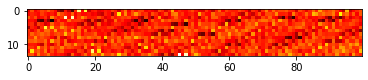

###############
###############
###############

Label is #[1. 0.]
Test sample #518


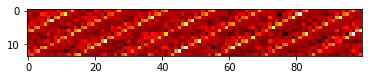

###############
###############
###############

Label is #[1. 0.]
Test sample #519


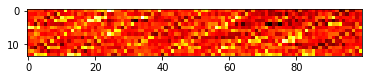

###############
###############
###############

Label is #[0. 1.]
Test sample #520


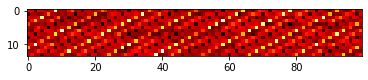

###############
###############
###############

Label is #[1. 0.]
Test sample #521


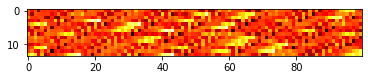

###############
###############
###############

Label is #[0. 1.]
Test sample #522


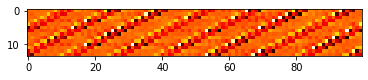

###############
###############
###############

Label is #[1. 0.]
Test sample #523


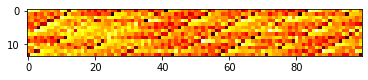

###############
###############
###############

Label is #[0. 1.]
Test sample #524


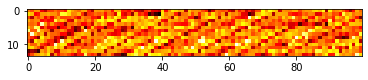

###############
###############
###############

Label is #[1. 0.]
Test sample #525


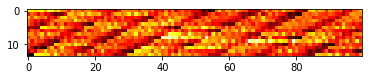

###############
###############
###############

Label is #[1. 0.]
Test sample #526


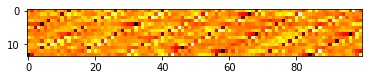

###############
###############
###############

Label is #[1. 0.]
Test sample #527


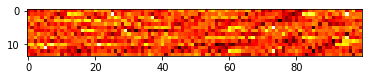

###############
###############
###############

Label is #[0. 1.]
Test sample #528


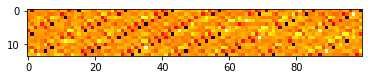

###############
###############
###############

Label is #[1. 0.]
Test sample #529


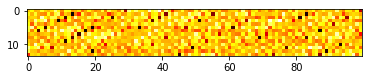

###############
###############
###############

Label is #[1. 0.]
Test sample #530


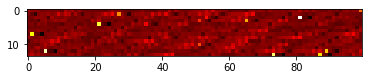

###############
###############
###############

Label is #[1. 0.]
Test sample #531


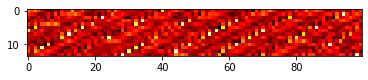

###############
###############
###############

Label is #[1. 0.]
Test sample #532


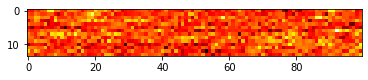

###############
###############
###############

Label is #[0. 1.]
Test sample #533


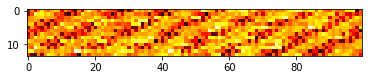

###############
###############
###############

Label is #[0. 1.]
Test sample #534


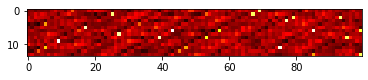

###############
###############
###############

Label is #[1. 0.]
Test sample #535


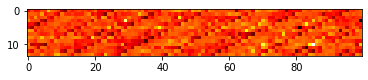

###############
###############
###############

Label is #[1. 0.]
Test sample #536


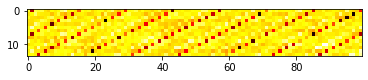

###############
###############
###############

Label is #[1. 0.]
Test sample #537


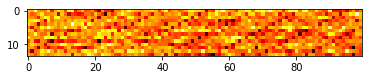

###############
###############
###############

Label is #[1. 0.]
Test sample #538


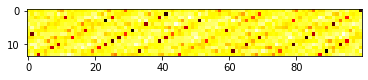

###############
###############
###############

Label is #[0. 1.]
Test sample #539


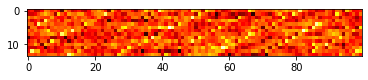

###############
###############
###############

Label is #[1. 0.]
Test sample #540


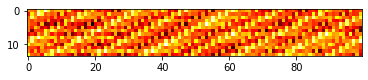

###############
###############
###############

Label is #[1. 0.]
Test sample #541


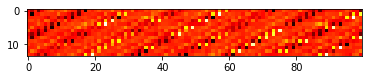

###############
###############
###############

Label is #[0. 1.]
Test sample #542


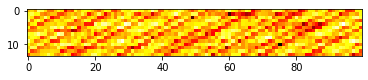

###############
###############
###############

Label is #[0. 1.]
Test sample #543


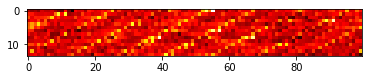

###############
###############
###############

Label is #[0. 1.]
Test sample #544


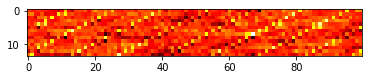

###############
###############
###############

Label is #[1. 0.]
Test sample #545


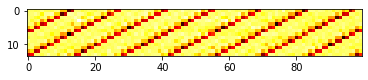

###############
###############
###############

Label is #[1. 0.]
Test sample #546


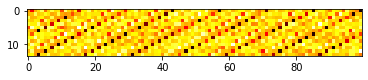

###############
###############
###############

Label is #[0. 1.]
Test sample #547


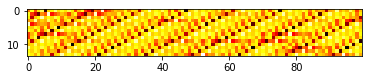

###############
###############
###############

Label is #[1. 0.]
Test sample #548


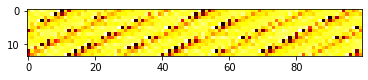

###############
###############
###############

Label is #[1. 0.]
Test sample #549


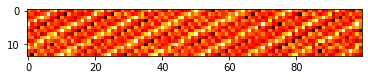

###############
###############
###############

Label is #[0. 1.]
Test sample #550


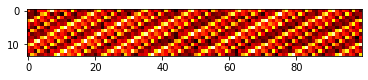

###############
###############
###############

Label is #[0. 1.]
Test sample #551


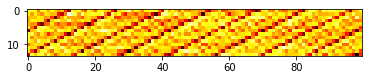

###############
###############
###############

Label is #[1. 0.]
Test sample #552


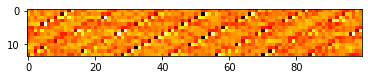

###############
###############
###############

Label is #[0. 1.]
Test sample #553


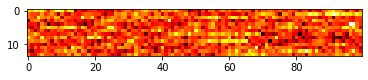

###############
###############
###############

Label is #[0. 1.]
Test sample #554


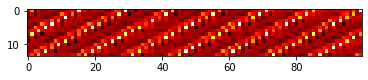

###############
###############
###############

Label is #[0. 1.]
Test sample #555


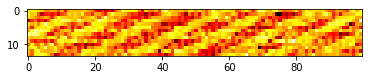

###############
###############
###############

Label is #[0. 1.]
Test sample #556


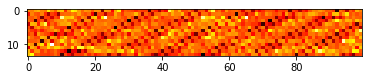

###############
###############
###############

Label is #[0. 1.]
Test sample #557


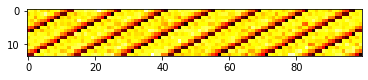

###############
###############
###############



In [168]:
for i in range(0, X_train.shape[0]):
    print("Label is #{}".format(Y_train[i]))
    print("Test sample #{}".format(i))
    plt.imshow(X_train[i,0,:,:], cmap='hot', interpolation='nearest')
    plt.show()
    print("###############\n###############\n###############\n")

In [24]:
from EEGModels import EEGNet
import numpy as np
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import metrics

def get_xp_val(xp):
    if xp == 'F1':
        xp_arr = [2,4,8,16,32]
    elif xp == 'D':
        xp_arr = [1,2,3,4,5]
    elif xp == 'F2':
        xp_arr = [4,8,16,32,64]
    return xp_arr


archive_name = 'TSC'
classifier_name = 'inception'
max_iterations = 5
output_directory = "."
input_shape = (14, 100)
nb_classes = 2

xps = [ 'F1', 'D', 'F2']
table = []
for xp in xps:

    xp_arr = get_xp_val(xp)
    
    print('xp', xp)

    for xp_val in xp_arr:
        print('\txp_val', xp_val)

        kwargs = {xp: xp_val}

        averaging = []
        acc_row = []
        acc_row.append(xp)
        acc_row.append(xp_val)
        print("Params: ",kwargs)
        for i in range(3):
            X_train, X_test, Y_train, Y_test = shuffle_split(0.90)

            model  = EEGNet(2, Chans = 14, Samples = 100, 
            **kwargs)

            model.compile(loss='categorical_crossentropy', optimizer='adam', 
                          metrics = ['categorical_accuracy'])

            checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1,
                                           save_best_only=True)
            fittedModel = model.fit(X_train, Y_train, batch_size = 32, epochs = 100, 
                                    verbose = False,validation_split = 0.1,
                                    callbacks=[checkpointer])
            model.load_weights('./checkpoit.h5')
            loss, acc = model.evaluate(X_test,  Y_test, verbose=2)
            averaging.append(acc)
            acc_row.append(acc)
            print("Untrained model, accuracy: {:5.2f}%".format(100*acc))
            print('\t\t\t\t', 'DONE')
        print("Trained model, mean by 3 accuracy: {:5.2f}%".format(100*np.mean(averaging)))
        acc_row.append(100*np.mean(averaging))
        print('\t\t\t\t', 'DONE')
        table.append(acc_row)
res = pd.DataFrame(table, columns = ['Metric', 'Metric val', 'Acc_1', 'Acc_2', 'Acc_3', 'Acc_mean'])

xp F1
	xp_val 2
Params:  {'F1': 2}
TRAIN: [231  97 318 ... 659 257 560] TEST: [ 882  963  311  301  575  875  169  718  529  705  821  470  107  818
  555  977  813  703  227  300  795  770  249  497  145  700 1158  187
   12 1118  456  307  585 1076  820  778   66  193  122  419  787  738
  856  397  637  992  638  900   77  197  676 1141  373  102  345  773
  805  929  627  883  114  319  552 1157  444  168  252  752  794  603
  270   18 1020   60  944  112  537  525   86   46  595  491  617  549
  831  105  183  779  546  612  364  826  394  743  540  733 1123  113
  421  352 1072 1106  840  740    6  160  551  823  800  919   40  602
   74    0  832 1087  664]

Epoch 00001: val_loss improved from inf to 0.69168, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69168

Epoch 00003: val_loss improved from 0.69168 to 0.69058, saving model to ./checkpoit.h5

Epoch 00004: val_loss did not improve from 0.69058

Epoch 00005: val_loss did not improve from 0.69058


Epoch 00023: val_loss did not improve from 0.68385

Epoch 00024: val_loss did not improve from 0.68385

Epoch 00025: val_loss did not improve from 0.68385

Epoch 00026: val_loss did not improve from 0.68385

Epoch 00027: val_loss did not improve from 0.68385

Epoch 00028: val_loss did not improve from 0.68385

Epoch 00029: val_loss did not improve from 0.68385

Epoch 00030: val_loss did not improve from 0.68385

Epoch 00031: val_loss did not improve from 0.68385

Epoch 00032: val_loss did not improve from 0.68385

Epoch 00033: val_loss did not improve from 0.68385

Epoch 00034: val_loss did not improve from 0.68385

Epoch 00035: val_loss did not improve from 0.68385

Epoch 00036: val_loss did not improve from 0.68385

Epoch 00037: val_loss did not improve from 0.68385

Epoch 00038: val_loss did not improve from 0.68385

Epoch 00039: val_loss did not improve from 0.68385

Epoch 00040: val_loss did not improve from 0.68385

Epoch 00041: val_loss did not improve from 0.68385

Epoch 00042


Epoch 00065: val_loss did not improve from 0.69197

Epoch 00066: val_loss did not improve from 0.69197

Epoch 00067: val_loss did not improve from 0.69197

Epoch 00068: val_loss did not improve from 0.69197

Epoch 00069: val_loss did not improve from 0.69197

Epoch 00070: val_loss did not improve from 0.69197

Epoch 00071: val_loss did not improve from 0.69197

Epoch 00072: val_loss did not improve from 0.69197

Epoch 00073: val_loss did not improve from 0.69197

Epoch 00074: val_loss did not improve from 0.69197

Epoch 00075: val_loss did not improve from 0.69197

Epoch 00076: val_loss did not improve from 0.69197

Epoch 00077: val_loss did not improve from 0.69197

Epoch 00078: val_loss did not improve from 0.69197

Epoch 00079: val_loss improved from 0.69197 to 0.69172, saving model to ./checkpoit.h5

Epoch 00080: val_loss did not improve from 0.69172

Epoch 00081: val_loss did not improve from 0.69172

Epoch 00082: val_loss did not improve from 0.69172

Epoch 00083: val_loss did n


Epoch 00001: val_loss improved from inf to 0.69257, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69257

Epoch 00003: val_loss did not improve from 0.69257

Epoch 00004: val_loss did not improve from 0.69257

Epoch 00005: val_loss improved from 0.69257 to 0.69226, saving model to ./checkpoit.h5

Epoch 00006: val_loss did not improve from 0.69226

Epoch 00007: val_loss did not improve from 0.69226

Epoch 00008: val_loss did not improve from 0.69226

Epoch 00009: val_loss did not improve from 0.69226

Epoch 00010: val_loss did not improve from 0.69226

Epoch 00011: val_loss did not improve from 0.69226

Epoch 00012: val_loss did not improve from 0.69226

Epoch 00013: val_loss improved from 0.69226 to 0.69064, saving model to ./checkpoit.h5

Epoch 00014: val_loss improved from 0.69064 to 0.69038, saving model to ./checkpoit.h5

Epoch 00015: val_loss did not improve from 0.69038

Epoch 00016: val_loss improved from 0.69038 to 0.68958, saving model to ./check


Epoch 00038: val_loss did not improve from 0.69339

Epoch 00039: val_loss did not improve from 0.69339

Epoch 00040: val_loss did not improve from 0.69339

Epoch 00041: val_loss did not improve from 0.69339

Epoch 00042: val_loss did not improve from 0.69339

Epoch 00043: val_loss did not improve from 0.69339

Epoch 00044: val_loss did not improve from 0.69339

Epoch 00045: val_loss did not improve from 0.69339

Epoch 00046: val_loss did not improve from 0.69339

Epoch 00047: val_loss did not improve from 0.69339

Epoch 00048: val_loss did not improve from 0.69339

Epoch 00049: val_loss did not improve from 0.69339

Epoch 00050: val_loss did not improve from 0.69339

Epoch 00051: val_loss did not improve from 0.69339

Epoch 00052: val_loss did not improve from 0.69339

Epoch 00053: val_loss did not improve from 0.69339

Epoch 00054: val_loss did not improve from 0.69339

Epoch 00055: val_loss did not improve from 0.69339

Epoch 00056: val_loss did not improve from 0.69339

Epoch 00057


Epoch 00075: val_loss did not improve from 0.69016

Epoch 00076: val_loss did not improve from 0.69016

Epoch 00077: val_loss did not improve from 0.69016

Epoch 00078: val_loss did not improve from 0.69016

Epoch 00079: val_loss did not improve from 0.69016

Epoch 00080: val_loss did not improve from 0.69016

Epoch 00081: val_loss did not improve from 0.69016

Epoch 00082: val_loss did not improve from 0.69016

Epoch 00083: val_loss did not improve from 0.69016

Epoch 00084: val_loss did not improve from 0.69016

Epoch 00085: val_loss did not improve from 0.69016

Epoch 00086: val_loss did not improve from 0.69016

Epoch 00087: val_loss did not improve from 0.69016

Epoch 00088: val_loss did not improve from 0.69016

Epoch 00089: val_loss did not improve from 0.69016

Epoch 00090: val_loss did not improve from 0.69016

Epoch 00091: val_loss did not improve from 0.69016

Epoch 00092: val_loss did not improve from 0.69016

Epoch 00093: val_loss did not improve from 0.69016

Epoch 00094


Epoch 00002: val_loss did not improve from 0.69436

Epoch 00003: val_loss did not improve from 0.69436

Epoch 00004: val_loss did not improve from 0.69436

Epoch 00005: val_loss did not improve from 0.69436

Epoch 00006: val_loss did not improve from 0.69436

Epoch 00007: val_loss did not improve from 0.69436

Epoch 00008: val_loss did not improve from 0.69436

Epoch 00009: val_loss did not improve from 0.69436

Epoch 00010: val_loss did not improve from 0.69436

Epoch 00011: val_loss improved from 0.69436 to 0.69418, saving model to ./checkpoit.h5

Epoch 00012: val_loss did not improve from 0.69418

Epoch 00013: val_loss improved from 0.69418 to 0.69406, saving model to ./checkpoit.h5

Epoch 00014: val_loss did not improve from 0.69406

Epoch 00015: val_loss improved from 0.69406 to 0.69265, saving model to ./checkpoit.h5

Epoch 00016: val_loss did not improve from 0.69265

Epoch 00017: val_loss did not improve from 0.69265

Epoch 00018: val_loss did not improve from 0.69265

Epoch 0


Epoch 00036: val_loss did not improve from 0.68651

Epoch 00037: val_loss did not improve from 0.68651

Epoch 00038: val_loss did not improve from 0.68651

Epoch 00039: val_loss did not improve from 0.68651

Epoch 00040: val_loss did not improve from 0.68651

Epoch 00041: val_loss did not improve from 0.68651

Epoch 00042: val_loss did not improve from 0.68651

Epoch 00043: val_loss did not improve from 0.68651

Epoch 00044: val_loss did not improve from 0.68651

Epoch 00045: val_loss did not improve from 0.68651

Epoch 00046: val_loss did not improve from 0.68651

Epoch 00047: val_loss did not improve from 0.68651

Epoch 00048: val_loss did not improve from 0.68651

Epoch 00049: val_loss did not improve from 0.68651

Epoch 00050: val_loss did not improve from 0.68651

Epoch 00051: val_loss did not improve from 0.68651

Epoch 00052: val_loss did not improve from 0.68651

Epoch 00053: val_loss did not improve from 0.68651

Epoch 00054: val_loss did not improve from 0.68651

Epoch 00055


Epoch 00079: val_loss did not improve from 0.69305

Epoch 00080: val_loss did not improve from 0.69305

Epoch 00081: val_loss did not improve from 0.69305

Epoch 00082: val_loss did not improve from 0.69305

Epoch 00083: val_loss did not improve from 0.69305

Epoch 00084: val_loss did not improve from 0.69305

Epoch 00085: val_loss did not improve from 0.69305

Epoch 00086: val_loss did not improve from 0.69305

Epoch 00087: val_loss did not improve from 0.69305

Epoch 00088: val_loss did not improve from 0.69305

Epoch 00089: val_loss did not improve from 0.69305

Epoch 00090: val_loss did not improve from 0.69305

Epoch 00091: val_loss did not improve from 0.69305

Epoch 00092: val_loss did not improve from 0.69305

Epoch 00093: val_loss did not improve from 0.69305

Epoch 00094: val_loss did not improve from 0.69305

Epoch 00095: val_loss did not improve from 0.69305

Epoch 00096: val_loss did not improve from 0.69305

Epoch 00097: val_loss did not improve from 0.69305

Epoch 00098


Epoch 00001: val_loss improved from inf to 0.69302, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69302

Epoch 00003: val_loss did not improve from 0.69302

Epoch 00004: val_loss did not improve from 0.69302

Epoch 00005: val_loss did not improve from 0.69302

Epoch 00006: val_loss did not improve from 0.69302

Epoch 00007: val_loss did not improve from 0.69302

Epoch 00008: val_loss did not improve from 0.69302

Epoch 00009: val_loss improved from 0.69302 to 0.69290, saving model to ./checkpoit.h5

Epoch 00010: val_loss did not improve from 0.69290

Epoch 00011: val_loss improved from 0.69290 to 0.69105, saving model to ./checkpoit.h5

Epoch 00012: val_loss did not improve from 0.69105

Epoch 00013: val_loss did not improve from 0.69105

Epoch 00014: val_loss did not improve from 0.69105

Epoch 00015: val_loss did not improve from 0.69105

Epoch 00016: val_loss did not improve from 0.69105

Epoch 00017: val_loss did not improve from 0.69105

Epoch 00018


Epoch 00037: val_loss did not improve from 0.68790

Epoch 00038: val_loss did not improve from 0.68790

Epoch 00039: val_loss did not improve from 0.68790

Epoch 00040: val_loss did not improve from 0.68790

Epoch 00041: val_loss did not improve from 0.68790

Epoch 00042: val_loss did not improve from 0.68790

Epoch 00043: val_loss did not improve from 0.68790

Epoch 00044: val_loss did not improve from 0.68790

Epoch 00045: val_loss did not improve from 0.68790

Epoch 00046: val_loss did not improve from 0.68790

Epoch 00047: val_loss did not improve from 0.68790

Epoch 00048: val_loss did not improve from 0.68790

Epoch 00049: val_loss did not improve from 0.68790

Epoch 00050: val_loss did not improve from 0.68790

Epoch 00051: val_loss did not improve from 0.68790

Epoch 00052: val_loss did not improve from 0.68790

Epoch 00053: val_loss did not improve from 0.68790

Epoch 00054: val_loss did not improve from 0.68790

Epoch 00055: val_loss did not improve from 0.68790

Epoch 00056


Epoch 00076: val_loss did not improve from 0.68983

Epoch 00077: val_loss did not improve from 0.68983

Epoch 00078: val_loss did not improve from 0.68983

Epoch 00079: val_loss did not improve from 0.68983

Epoch 00080: val_loss did not improve from 0.68983

Epoch 00081: val_loss did not improve from 0.68983

Epoch 00082: val_loss did not improve from 0.68983

Epoch 00083: val_loss did not improve from 0.68983

Epoch 00084: val_loss did not improve from 0.68983

Epoch 00085: val_loss did not improve from 0.68983

Epoch 00086: val_loss did not improve from 0.68983

Epoch 00087: val_loss did not improve from 0.68983

Epoch 00088: val_loss did not improve from 0.68983

Epoch 00089: val_loss did not improve from 0.68983

Epoch 00090: val_loss did not improve from 0.68983

Epoch 00091: val_loss did not improve from 0.68983

Epoch 00092: val_loss did not improve from 0.68983

Epoch 00093: val_loss did not improve from 0.68983

Epoch 00094: val_loss did not improve from 0.68983

Epoch 00095


Epoch 00001: val_loss improved from inf to 0.69322, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69322

Epoch 00003: val_loss did not improve from 0.69322

Epoch 00004: val_loss did not improve from 0.69322

Epoch 00005: val_loss did not improve from 0.69322

Epoch 00006: val_loss did not improve from 0.69322

Epoch 00007: val_loss did not improve from 0.69322

Epoch 00008: val_loss did not improve from 0.69322

Epoch 00009: val_loss did not improve from 0.69322

Epoch 00010: val_loss did not improve from 0.69322

Epoch 00011: val_loss did not improve from 0.69322

Epoch 00012: val_loss did not improve from 0.69322

Epoch 00013: val_loss did not improve from 0.69322

Epoch 00014: val_loss did not improve from 0.69322

Epoch 00015: val_loss did not improve from 0.69322

Epoch 00016: val_loss did not improve from 0.69322

Epoch 00017: val_loss did not improve from 0.69322

Epoch 00018: val_loss did not improve from 0.69322

Epoch 00019: val_loss did not i


Epoch 00038: val_loss did not improve from 0.69097

Epoch 00039: val_loss did not improve from 0.69097

Epoch 00040: val_loss did not improve from 0.69097

Epoch 00041: val_loss did not improve from 0.69097

Epoch 00042: val_loss did not improve from 0.69097

Epoch 00043: val_loss did not improve from 0.69097

Epoch 00044: val_loss did not improve from 0.69097

Epoch 00045: val_loss did not improve from 0.69097

Epoch 00046: val_loss did not improve from 0.69097

Epoch 00047: val_loss did not improve from 0.69097

Epoch 00048: val_loss did not improve from 0.69097

Epoch 00049: val_loss did not improve from 0.69097

Epoch 00050: val_loss did not improve from 0.69097

Epoch 00051: val_loss did not improve from 0.69097

Epoch 00052: val_loss did not improve from 0.69097

Epoch 00053: val_loss did not improve from 0.69097

Epoch 00054: val_loss did not improve from 0.69097

Epoch 00055: val_loss did not improve from 0.69097

Epoch 00056: val_loss did not improve from 0.69097

Epoch 00057


Epoch 00080: val_loss did not improve from 0.69451

Epoch 00081: val_loss did not improve from 0.69451

Epoch 00082: val_loss did not improve from 0.69451

Epoch 00083: val_loss did not improve from 0.69451

Epoch 00084: val_loss did not improve from 0.69451

Epoch 00085: val_loss did not improve from 0.69451

Epoch 00086: val_loss did not improve from 0.69451

Epoch 00087: val_loss did not improve from 0.69451

Epoch 00088: val_loss did not improve from 0.69451

Epoch 00089: val_loss did not improve from 0.69451

Epoch 00090: val_loss did not improve from 0.69451

Epoch 00091: val_loss did not improve from 0.69451

Epoch 00092: val_loss did not improve from 0.69451

Epoch 00093: val_loss did not improve from 0.69451

Epoch 00094: val_loss did not improve from 0.69451

Epoch 00095: val_loss did not improve from 0.69451

Epoch 00096: val_loss did not improve from 0.69451

Epoch 00097: val_loss did not improve from 0.69451

Epoch 00098: val_loss did not improve from 0.69451

Epoch 00099


Epoch 00002: val_loss improved from 0.69351 to 0.69332, saving model to ./checkpoit.h5

Epoch 00003: val_loss did not improve from 0.69332

Epoch 00004: val_loss did not improve from 0.69332

Epoch 00005: val_loss did not improve from 0.69332

Epoch 00006: val_loss did not improve from 0.69332

Epoch 00007: val_loss did not improve from 0.69332

Epoch 00008: val_loss did not improve from 0.69332

Epoch 00009: val_loss did not improve from 0.69332

Epoch 00010: val_loss did not improve from 0.69332

Epoch 00011: val_loss improved from 0.69332 to 0.69323, saving model to ./checkpoit.h5

Epoch 00012: val_loss did not improve from 0.69323

Epoch 00013: val_loss did not improve from 0.69323

Epoch 00014: val_loss did not improve from 0.69323

Epoch 00015: val_loss improved from 0.69323 to 0.69232, saving model to ./checkpoit.h5

Epoch 00016: val_loss did not improve from 0.69232

Epoch 00017: val_loss did not improve from 0.69232

Epoch 00018: val_loss improved from 0.69232 to 0.69190, sav


Epoch 00035: val_loss did not improve from 0.69114

Epoch 00036: val_loss did not improve from 0.69114

Epoch 00037: val_loss did not improve from 0.69114

Epoch 00038: val_loss did not improve from 0.69114

Epoch 00039: val_loss did not improve from 0.69114

Epoch 00040: val_loss did not improve from 0.69114

Epoch 00041: val_loss did not improve from 0.69114

Epoch 00042: val_loss did not improve from 0.69114

Epoch 00043: val_loss did not improve from 0.69114

Epoch 00044: val_loss did not improve from 0.69114

Epoch 00045: val_loss did not improve from 0.69114

Epoch 00046: val_loss did not improve from 0.69114

Epoch 00047: val_loss did not improve from 0.69114

Epoch 00048: val_loss did not improve from 0.69114

Epoch 00049: val_loss did not improve from 0.69114

Epoch 00050: val_loss did not improve from 0.69114

Epoch 00051: val_loss did not improve from 0.69114

Epoch 00052: val_loss did not improve from 0.69114

Epoch 00053: val_loss did not improve from 0.69114

Epoch 00054


Epoch 00077: val_loss did not improve from 0.69222

Epoch 00078: val_loss did not improve from 0.69222

Epoch 00079: val_loss did not improve from 0.69222

Epoch 00080: val_loss did not improve from 0.69222

Epoch 00081: val_loss did not improve from 0.69222

Epoch 00082: val_loss did not improve from 0.69222

Epoch 00083: val_loss did not improve from 0.69222

Epoch 00084: val_loss did not improve from 0.69222

Epoch 00085: val_loss did not improve from 0.69222

Epoch 00086: val_loss did not improve from 0.69222

Epoch 00087: val_loss did not improve from 0.69222

Epoch 00088: val_loss did not improve from 0.69222

Epoch 00089: val_loss did not improve from 0.69222

Epoch 00090: val_loss did not improve from 0.69222

Epoch 00091: val_loss did not improve from 0.69222

Epoch 00092: val_loss did not improve from 0.69222

Epoch 00093: val_loss did not improve from 0.69222

Epoch 00094: val_loss did not improve from 0.69222

Epoch 00095: val_loss did not improve from 0.69222

Epoch 00096


Epoch 00001: val_loss improved from inf to 0.69377, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69377

Epoch 00003: val_loss did not improve from 0.69377

Epoch 00004: val_loss did not improve from 0.69377

Epoch 00005: val_loss did not improve from 0.69377

Epoch 00006: val_loss did not improve from 0.69377

Epoch 00007: val_loss did not improve from 0.69377

Epoch 00008: val_loss did not improve from 0.69377

Epoch 00009: val_loss did not improve from 0.69377

Epoch 00010: val_loss did not improve from 0.69377

Epoch 00011: val_loss did not improve from 0.69377

Epoch 00012: val_loss did not improve from 0.69377

Epoch 00013: val_loss did not improve from 0.69377

Epoch 00014: val_loss did not improve from 0.69377

Epoch 00015: val_loss did not improve from 0.69377

Epoch 00016: val_loss did not improve from 0.69377

Epoch 00017: val_loss did not improve from 0.69377

Epoch 00018: val_loss did not improve from 0.69377

Epoch 00019: val_loss did not i


Epoch 00040: val_loss did not improve from 0.68329

Epoch 00041: val_loss did not improve from 0.68329

Epoch 00042: val_loss did not improve from 0.68329

Epoch 00043: val_loss did not improve from 0.68329

Epoch 00044: val_loss did not improve from 0.68329

Epoch 00045: val_loss did not improve from 0.68329

Epoch 00046: val_loss did not improve from 0.68329

Epoch 00047: val_loss did not improve from 0.68329

Epoch 00048: val_loss did not improve from 0.68329

Epoch 00049: val_loss did not improve from 0.68329

Epoch 00050: val_loss did not improve from 0.68329

Epoch 00051: val_loss did not improve from 0.68329

Epoch 00052: val_loss did not improve from 0.68329

Epoch 00053: val_loss did not improve from 0.68329

Epoch 00054: val_loss did not improve from 0.68329

Epoch 00055: val_loss did not improve from 0.68329

Epoch 00056: val_loss did not improve from 0.68329

Epoch 00057: val_loss did not improve from 0.68329

Epoch 00058: val_loss did not improve from 0.68329

Epoch 00059


Epoch 00076: val_loss did not improve from 0.67880

Epoch 00077: val_loss did not improve from 0.67880

Epoch 00078: val_loss did not improve from 0.67880

Epoch 00079: val_loss did not improve from 0.67880

Epoch 00080: val_loss did not improve from 0.67880

Epoch 00081: val_loss did not improve from 0.67880

Epoch 00082: val_loss did not improve from 0.67880

Epoch 00083: val_loss did not improve from 0.67880

Epoch 00084: val_loss did not improve from 0.67880

Epoch 00085: val_loss did not improve from 0.67880

Epoch 00086: val_loss did not improve from 0.67880

Epoch 00087: val_loss did not improve from 0.67880

Epoch 00088: val_loss did not improve from 0.67880

Epoch 00089: val_loss did not improve from 0.67880

Epoch 00090: val_loss did not improve from 0.67880

Epoch 00091: val_loss improved from 0.67880 to 0.66710, saving model to ./checkpoit.h5

Epoch 00092: val_loss did not improve from 0.66710

Epoch 00093: val_loss did not improve from 0.66710

Epoch 00094: val_loss did n


Epoch 00001: val_loss improved from inf to 0.69386, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69386

Epoch 00003: val_loss improved from 0.69386 to 0.69355, saving model to ./checkpoit.h5

Epoch 00004: val_loss improved from 0.69355 to 0.69354, saving model to ./checkpoit.h5

Epoch 00005: val_loss improved from 0.69354 to 0.69317, saving model to ./checkpoit.h5

Epoch 00006: val_loss did not improve from 0.69317

Epoch 00007: val_loss did not improve from 0.69317

Epoch 00008: val_loss did not improve from 0.69317

Epoch 00009: val_loss did not improve from 0.69317

Epoch 00010: val_loss did not improve from 0.69317

Epoch 00011: val_loss improved from 0.69317 to 0.69145, saving model to ./checkpoit.h5

Epoch 00012: val_loss improved from 0.69145 to 0.69074, saving model to ./checkpoit.h5

Epoch 00013: val_loss did not improve from 0.69074

Epoch 00014: val_loss did not improve from 0.69074

Epoch 00015: val_loss did not improve from 0.69074

Epoch 0


Epoch 00037: val_loss did not improve from 0.68365

Epoch 00038: val_loss did not improve from 0.68365

Epoch 00039: val_loss did not improve from 0.68365

Epoch 00040: val_loss did not improve from 0.68365

Epoch 00041: val_loss did not improve from 0.68365

Epoch 00042: val_loss did not improve from 0.68365

Epoch 00043: val_loss did not improve from 0.68365

Epoch 00044: val_loss did not improve from 0.68365

Epoch 00045: val_loss did not improve from 0.68365

Epoch 00046: val_loss did not improve from 0.68365

Epoch 00047: val_loss did not improve from 0.68365

Epoch 00048: val_loss did not improve from 0.68365

Epoch 00049: val_loss did not improve from 0.68365

Epoch 00050: val_loss did not improve from 0.68365

Epoch 00051: val_loss did not improve from 0.68365

Epoch 00052: val_loss did not improve from 0.68365

Epoch 00053: val_loss did not improve from 0.68365

Epoch 00054: val_loss did not improve from 0.68365

Epoch 00055: val_loss did not improve from 0.68365

Epoch 00056


Epoch 00069: val_loss did not improve from 0.68427

Epoch 00070: val_loss did not improve from 0.68427

Epoch 00071: val_loss did not improve from 0.68427

Epoch 00072: val_loss did not improve from 0.68427

Epoch 00073: val_loss did not improve from 0.68427

Epoch 00074: val_loss did not improve from 0.68427

Epoch 00075: val_loss did not improve from 0.68427

Epoch 00076: val_loss did not improve from 0.68427

Epoch 00077: val_loss did not improve from 0.68427

Epoch 00078: val_loss did not improve from 0.68427

Epoch 00079: val_loss did not improve from 0.68427

Epoch 00080: val_loss did not improve from 0.68427

Epoch 00081: val_loss did not improve from 0.68427

Epoch 00082: val_loss did not improve from 0.68427

Epoch 00083: val_loss did not improve from 0.68427

Epoch 00084: val_loss did not improve from 0.68427

Epoch 00085: val_loss did not improve from 0.68427

Epoch 00086: val_loss did not improve from 0.68427

Epoch 00087: val_loss did not improve from 0.68427

Epoch 00088


Epoch 00001: val_loss improved from inf to 0.69246, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69246

Epoch 00003: val_loss did not improve from 0.69246

Epoch 00004: val_loss did not improve from 0.69246

Epoch 00005: val_loss did not improve from 0.69246

Epoch 00006: val_loss did not improve from 0.69246

Epoch 00007: val_loss did not improve from 0.69246

Epoch 00008: val_loss did not improve from 0.69246

Epoch 00009: val_loss did not improve from 0.69246

Epoch 00010: val_loss did not improve from 0.69246

Epoch 00011: val_loss did not improve from 0.69246

Epoch 00012: val_loss did not improve from 0.69246

Epoch 00013: val_loss did not improve from 0.69246

Epoch 00014: val_loss did not improve from 0.69246

Epoch 00015: val_loss did not improve from 0.69246

Epoch 00016: val_loss did not improve from 0.69246

Epoch 00017: val_loss did not improve from 0.69246

Epoch 00018: val_loss did not improve from 0.69246

Epoch 00019: val_loss did not i


Epoch 00038: val_loss did not improve from 0.68968

Epoch 00039: val_loss did not improve from 0.68968

Epoch 00040: val_loss did not improve from 0.68968

Epoch 00041: val_loss did not improve from 0.68968

Epoch 00042: val_loss did not improve from 0.68968

Epoch 00043: val_loss did not improve from 0.68968

Epoch 00044: val_loss did not improve from 0.68968

Epoch 00045: val_loss did not improve from 0.68968

Epoch 00046: val_loss did not improve from 0.68968

Epoch 00047: val_loss did not improve from 0.68968

Epoch 00048: val_loss did not improve from 0.68968

Epoch 00049: val_loss did not improve from 0.68968

Epoch 00050: val_loss did not improve from 0.68968

Epoch 00051: val_loss did not improve from 0.68968

Epoch 00052: val_loss did not improve from 0.68968

Epoch 00053: val_loss did not improve from 0.68968

Epoch 00054: val_loss did not improve from 0.68968

Epoch 00055: val_loss did not improve from 0.68968

Epoch 00056: val_loss did not improve from 0.68968

Epoch 00057


Epoch 00076: val_loss did not improve from 0.68553

Epoch 00077: val_loss did not improve from 0.68553

Epoch 00078: val_loss did not improve from 0.68553

Epoch 00079: val_loss did not improve from 0.68553

Epoch 00080: val_loss did not improve from 0.68553

Epoch 00081: val_loss did not improve from 0.68553

Epoch 00082: val_loss did not improve from 0.68553

Epoch 00083: val_loss did not improve from 0.68553

Epoch 00084: val_loss did not improve from 0.68553

Epoch 00085: val_loss did not improve from 0.68553

Epoch 00086: val_loss did not improve from 0.68553

Epoch 00087: val_loss did not improve from 0.68553

Epoch 00088: val_loss did not improve from 0.68553

Epoch 00089: val_loss did not improve from 0.68553

Epoch 00090: val_loss did not improve from 0.68553

Epoch 00091: val_loss did not improve from 0.68553

Epoch 00092: val_loss did not improve from 0.68553

Epoch 00093: val_loss did not improve from 0.68553

Epoch 00094: val_loss did not improve from 0.68553

Epoch 00095


Epoch 00001: val_loss improved from inf to 0.69293, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69293

Epoch 00003: val_loss did not improve from 0.69293

Epoch 00004: val_loss did not improve from 0.69293

Epoch 00005: val_loss did not improve from 0.69293

Epoch 00006: val_loss did not improve from 0.69293

Epoch 00007: val_loss did not improve from 0.69293

Epoch 00008: val_loss did not improve from 0.69293

Epoch 00009: val_loss did not improve from 0.69293

Epoch 00010: val_loss did not improve from 0.69293

Epoch 00011: val_loss did not improve from 0.69293

Epoch 00012: val_loss did not improve from 0.69293

Epoch 00013: val_loss did not improve from 0.69293

Epoch 00014: val_loss did not improve from 0.69293

Epoch 00015: val_loss did not improve from 0.69293

Epoch 00016: val_loss did not improve from 0.69293

Epoch 00017: val_loss did not improve from 0.69293

Epoch 00018: val_loss did not improve from 0.69293

Epoch 00019: val_loss did not i


Epoch 00041: val_loss did not improve from 0.68901

Epoch 00042: val_loss did not improve from 0.68901

Epoch 00043: val_loss did not improve from 0.68901

Epoch 00044: val_loss did not improve from 0.68901

Epoch 00045: val_loss did not improve from 0.68901

Epoch 00046: val_loss did not improve from 0.68901

Epoch 00047: val_loss did not improve from 0.68901

Epoch 00048: val_loss did not improve from 0.68901

Epoch 00049: val_loss did not improve from 0.68901

Epoch 00050: val_loss did not improve from 0.68901

Epoch 00051: val_loss did not improve from 0.68901

Epoch 00052: val_loss did not improve from 0.68901

Epoch 00053: val_loss did not improve from 0.68901

Epoch 00054: val_loss did not improve from 0.68901

Epoch 00055: val_loss did not improve from 0.68901

Epoch 00056: val_loss did not improve from 0.68901

Epoch 00057: val_loss did not improve from 0.68901

Epoch 00058: val_loss did not improve from 0.68901

Epoch 00059: val_loss did not improve from 0.68901

Epoch 00060


Epoch 00071: val_loss did not improve from 0.67831

Epoch 00072: val_loss did not improve from 0.67831

Epoch 00073: val_loss did not improve from 0.67831

Epoch 00074: val_loss did not improve from 0.67831

Epoch 00075: val_loss did not improve from 0.67831

Epoch 00076: val_loss did not improve from 0.67831

Epoch 00077: val_loss did not improve from 0.67831

Epoch 00078: val_loss did not improve from 0.67831

Epoch 00079: val_loss did not improve from 0.67831

Epoch 00080: val_loss did not improve from 0.67831

Epoch 00081: val_loss did not improve from 0.67831

Epoch 00082: val_loss did not improve from 0.67831

Epoch 00083: val_loss did not improve from 0.67831

Epoch 00084: val_loss did not improve from 0.67831

Epoch 00085: val_loss did not improve from 0.67831

Epoch 00086: val_loss did not improve from 0.67831

Epoch 00087: val_loss did not improve from 0.67831

Epoch 00088: val_loss did not improve from 0.67831

Epoch 00089: val_loss did not improve from 0.67831

Epoch 00090


Epoch 00001: val_loss improved from inf to 0.69281, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69281

Epoch 00003: val_loss did not improve from 0.69281

Epoch 00004: val_loss improved from 0.69281 to 0.69233, saving model to ./checkpoit.h5

Epoch 00005: val_loss improved from 0.69233 to 0.69150, saving model to ./checkpoit.h5

Epoch 00006: val_loss did not improve from 0.69150

Epoch 00007: val_loss did not improve from 0.69150

Epoch 00008: val_loss improved from 0.69150 to 0.69027, saving model to ./checkpoit.h5

Epoch 00009: val_loss improved from 0.69027 to 0.68996, saving model to ./checkpoit.h5

Epoch 00010: val_loss did not improve from 0.68996

Epoch 00011: val_loss improved from 0.68996 to 0.68923, saving model to ./checkpoit.h5

Epoch 00012: val_loss did not improve from 0.68923

Epoch 00013: val_loss improved from 0.68923 to 0.68881, saving model to ./checkpoit.h5

Epoch 00014: val_loss improved from 0.68881 to 0.68800, saving model to ./c


Epoch 00034: val_loss did not improve from 0.68853

Epoch 00035: val_loss did not improve from 0.68853

Epoch 00036: val_loss did not improve from 0.68853

Epoch 00037: val_loss did not improve from 0.68853

Epoch 00038: val_loss did not improve from 0.68853

Epoch 00039: val_loss did not improve from 0.68853

Epoch 00040: val_loss did not improve from 0.68853

Epoch 00041: val_loss did not improve from 0.68853

Epoch 00042: val_loss did not improve from 0.68853

Epoch 00043: val_loss did not improve from 0.68853

Epoch 00044: val_loss did not improve from 0.68853

Epoch 00045: val_loss did not improve from 0.68853

Epoch 00046: val_loss did not improve from 0.68853

Epoch 00047: val_loss did not improve from 0.68853

Epoch 00048: val_loss did not improve from 0.68853

Epoch 00049: val_loss did not improve from 0.68853

Epoch 00050: val_loss did not improve from 0.68853

Epoch 00051: val_loss did not improve from 0.68853

Epoch 00052: val_loss did not improve from 0.68853

Epoch 00053


Epoch 00071: val_loss did not improve from 0.68213

Epoch 00072: val_loss did not improve from 0.68213

Epoch 00073: val_loss did not improve from 0.68213

Epoch 00074: val_loss did not improve from 0.68213

Epoch 00075: val_loss did not improve from 0.68213

Epoch 00076: val_loss did not improve from 0.68213

Epoch 00077: val_loss did not improve from 0.68213

Epoch 00078: val_loss did not improve from 0.68213

Epoch 00079: val_loss did not improve from 0.68213

Epoch 00080: val_loss did not improve from 0.68213

Epoch 00081: val_loss did not improve from 0.68213

Epoch 00082: val_loss did not improve from 0.68213

Epoch 00083: val_loss did not improve from 0.68213

Epoch 00084: val_loss did not improve from 0.68213

Epoch 00085: val_loss did not improve from 0.68213

Epoch 00086: val_loss did not improve from 0.68213

Epoch 00087: val_loss did not improve from 0.68213

Epoch 00088: val_loss did not improve from 0.68213

Epoch 00089: val_loss did not improve from 0.68213

Epoch 00090


Epoch 00001: val_loss improved from inf to 0.69115, saving model to ./checkpoit.h5

Epoch 00002: val_loss did not improve from 0.69115

Epoch 00003: val_loss did not improve from 0.69115

Epoch 00004: val_loss did not improve from 0.69115

Epoch 00005: val_loss did not improve from 0.69115

Epoch 00006: val_loss did not improve from 0.69115

Epoch 00007: val_loss did not improve from 0.69115

Epoch 00008: val_loss did not improve from 0.69115

Epoch 00009: val_loss did not improve from 0.69115

Epoch 00010: val_loss did not improve from 0.69115

Epoch 00011: val_loss did not improve from 0.69115

Epoch 00012: val_loss did not improve from 0.69115

Epoch 00013: val_loss did not improve from 0.69115

Epoch 00014: val_loss did not improve from 0.69115

Epoch 00015: val_loss did not improve from 0.69115

Epoch 00016: val_loss did not improve from 0.69115

Epoch 00017: val_loss did not improve from 0.69115

Epoch 00018: val_loss did not improve from 0.69115

Epoch 00019: val_loss did not i

In [25]:
res 

Metric  Metric val     Acc_1     Acc_2     Acc_3   Acc_mean
0      F1           2  0.478632  0.470085  0.444444  46.438745
1      F1           4  0.495726  0.495726  0.478632  49.002850
2      F1           8  0.444444  0.461538  0.435897  44.729343
3      F1          16  0.435897  0.487179  0.384615  43.589744
4      F1          32  0.478632  0.461538  0.461538  46.723649
5       D           1  0.470085  0.521368  0.410256  46.723649
6       D           2  0.495726  0.461538  0.572650  50.997156
7       D           3  0.427350  0.478632  0.444444  45.014247
8       D           4  0.504274  0.478632  0.470085  48.433051
9       D           5  0.512821  0.529915  0.487179  50.997156
10     F2           4  0.478632  0.495726  0.470085  48.148146
11     F2           8  0.547009  0.572650  0.521368  54.700857
12     F2          16  0.495726  0.521368  0.470085  49.572650
13     F2          32  0.452991  0.478632  0.495726  47.578347
14     F2          64  0.538462  0.512821  0.470085  50.712258

In [ ]:
F1 = 4
D = 5
F2 = 8



In [42]:
from EEGModels import EEGNet
import numpy as np
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import metrics

def get_xp_val(xp):
    if xp == 'dropoutRate':
        xp_arr = [0, 0.2, 0.3, 0.4, 0.5, 0.7]
    elif xp == 'kernLength':
        xp_arr = [50, 100 , 200]
    elif xp == 'norm_rate':
        xp_arr = [0.1, 0.2, 0.3, 0.4, 0.6]
    elif xp == 'dropoutType':
        xp_arr = ['SpatialDropout2D', 'Dropout']   
    return xp_arr


archive_name = 'TSC'
classifier_name = 'inception'
max_iterations = 5
output_directory = "."
input_shape = (14, 100)
nb_classes = 2

xps = [ 'dropoutRate','kernLength' ,'norm_rate',  'dropoutType']
table = []
for xp in xps:

    xp_arr = get_xp_val(xp)
    
    print('xp', xp)

    for xp_val in xp_arr:
        print('\txp_val', xp_val)

        kwargs = {xp: xp_val}

        averaging = []
        acc_row = []
        acc_row.append(xp)
        acc_row.append(xp_val)
        print("Params: ",kwargs)
        model  = EEGNet(2, Chans = 14, Samples = 100, F1 = 4, D = 5, F2 = 8,
        **kwargs)
        model.compile(loss='categorical_crossentropy', optimizer='adam', 
                      metrics = ['categorical_accuracy'])
        checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1,
                                       save_best_only=True)
        acc_row = get_cv_score(model, checkpointer, X, y, n_epoch = 100, val_split = 0.1)
        print('\t\t\t\t', 'DONE')
        table.append(acc_row)
res = pd.DataFrame(table, columns = ['Metric', 'Metric val', 'Acc_1', 'Acc_2', 'Acc_3','Acc_4', 'Acc_5' 'Acc_mean'])

xp dropoutRate
	xp_val 0
Params:  {'dropoutRate': 0}
TRAIN: [ 292  293  294  295  296  297  298  299  300  301  302  303  304  305
  306  307  308  309  310  311  312  313  314  315  316  317  318  319
  320  321  322  323  324  325  326  327  328  329  330  331  332  333
  334  335  336  337  338  339  340  341  342  343  344  345  346  347
  348  349  350  351  352  353  354  355  356  357  358  359  360  361
  362  363  364  365  366  367  368  369  370  371  372  373  374  375
  376  377  378  379  380  381  382  383  384  385  386  387  388  389
  390  391  392  393  394  395  396  397  398  399  400  401  402  403
  404  405  406  407  408  409  410  411  412  413  414  415  416  417
  418  419  420  421  422  423  424  425  426  427  428  429  430  431
  432  433  434  435  436  437  438  439  440  441  442  443  444  445
  446  447  448  449  450  451  452  453  454  455  456  457  458  459
  460  461  462  463  464  465  466  467  468  469  470  471  472  473
  474  475  476  


Epoch 00039: val_loss improved from 0.37339 to 0.35927, saving model to ./checkpoit.h5

Epoch 00040: val_loss did not improve from 0.35927

Epoch 00041: val_loss did not improve from 0.35927

Epoch 00042: val_loss did not improve from 0.35927

Epoch 00043: val_loss did not improve from 0.35927

Epoch 00044: val_loss did not improve from 0.35927

Epoch 00045: val_loss did not improve from 0.35927

Epoch 00046: val_loss did not improve from 0.35927

Epoch 00047: val_loss did not improve from 0.35927

Epoch 00048: val_loss did not improve from 0.35927

Epoch 00049: val_loss did not improve from 0.35927

Epoch 00050: val_loss did not improve from 0.35927

Epoch 00051: val_loss did not improve from 0.35927

Epoch 00052: val_loss did not improve from 0.35927

Epoch 00053: val_loss did not improve from 0.35927

Epoch 00054: val_loss did not improve from 0.35927

Epoch 00055: val_loss did not improve from 0.35927

Epoch 00056: val_loss did not improve from 0.35927

Epoch 00057: val_loss did n


Epoch 00001: val_loss did not improve from 0.35927

Epoch 00002: val_loss did not improve from 0.35927

Epoch 00003: val_loss did not improve from 0.35927

Epoch 00004: val_loss did not improve from 0.35927

Epoch 00005: val_loss did not improve from 0.35927

Epoch 00006: val_loss did not improve from 0.35927

Epoch 00007: val_loss did not improve from 0.35927

Epoch 00008: val_loss did not improve from 0.35927

Epoch 00009: val_loss did not improve from 0.35927

Epoch 00010: val_loss did not improve from 0.35927

Epoch 00011: val_loss did not improve from 0.35927

Epoch 00012: val_loss did not improve from 0.35927

Epoch 00013: val_loss did not improve from 0.35927

Epoch 00014: val_loss did not improve from 0.35927

Epoch 00015: val_loss did not improve from 0.35927

Epoch 00016: val_loss did not improve from 0.35927

Epoch 00017: val_loss did not improve from 0.35927

Epoch 00018: val_loss did not improve from 0.35927

Epoch 00019: val_loss did not improve from 0.35927

Epoch 00020


Epoch 00001: val_loss did not improve from 0.29759

Epoch 00002: val_loss did not improve from 0.29759

Epoch 00003: val_loss did not improve from 0.29759

Epoch 00004: val_loss did not improve from 0.29759

Epoch 00005: val_loss did not improve from 0.29759

Epoch 00006: val_loss did not improve from 0.29759

Epoch 00007: val_loss did not improve from 0.29759

Epoch 00008: val_loss did not improve from 0.29759

Epoch 00009: val_loss did not improve from 0.29759

Epoch 00010: val_loss did not improve from 0.29759

Epoch 00011: val_loss did not improve from 0.29759

Epoch 00012: val_loss did not improve from 0.29759

Epoch 00013: val_loss did not improve from 0.29759

Epoch 00014: val_loss did not improve from 0.29759

Epoch 00015: val_loss did not improve from 0.29759

Epoch 00016: val_loss did not improve from 0.29759

Epoch 00017: val_loss did not improve from 0.29759

Epoch 00018: val_loss did not improve from 0.29759

Epoch 00019: val_loss did not improve from 0.29759

Epoch 00020


Epoch 00001: val_loss did not improve from 0.29759

Epoch 00002: val_loss did not improve from 0.29759

Epoch 00003: val_loss did not improve from 0.29759

Epoch 00004: val_loss did not improve from 0.29759

Epoch 00005: val_loss did not improve from 0.29759

Epoch 00006: val_loss did not improve from 0.29759

Epoch 00007: val_loss did not improve from 0.29759

Epoch 00008: val_loss did not improve from 0.29759

Epoch 00009: val_loss did not improve from 0.29759

Epoch 00010: val_loss did not improve from 0.29759

Epoch 00011: val_loss did not improve from 0.29759

Epoch 00012: val_loss did not improve from 0.29759

Epoch 00013: val_loss did not improve from 0.29759

Epoch 00014: val_loss did not improve from 0.29759

Epoch 00015: val_loss did not improve from 0.29759

Epoch 00016: val_loss did not improve from 0.29759

Epoch 00017: val_loss did not improve from 0.29759

Epoch 00018: val_loss did not improve from 0.29759

Epoch 00019: val_loss did not improve from 0.29759

Epoch 00020

KeyboardInterrupt: 

In [92]:
import numpy as np
from sklearn.model_selection import KFold

def get_cv_score(est, checkpointer, X, y, n_epoch = 30, val_split = 0.1):
    kf = KFold(n_splits=10)
    acc_row = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        est.fit(X_train, y_train, batch_size = 32, epochs = n_epoch, 
                                    verbose = 2,validation_split = val_split,
                                    callbacks=[checkpointer])
        est.load_weights('./checkpoit.h5')
        loss, acc = est.evaluate(X_test,  y_test, verbose=2)
        acc_row.append(acc)
    acc_row.append(np.mean(acc_row))
    return  acc_row

In [107]:
model  = EEGNet(2, Chans = 14, Samples = 100, F1 = 16, D = 8, F2 = 32,
       dropoutRate = 0.5, kernLength = 300, norm_rate = 0.4, dropoutType = 'Dropout')
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['categorical_accuracy'])
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1, save_best_only=True)
acc_row = get_cv_score(model, checkpointer, X, y, n_epoch = 50, val_split = 0.1)
table = []
table.append(acc_row)
res = pd.DataFrame(table)
res

Train on 945 samples, validate on 105 samples
Epoch 1/50

Epoch 00001: val_loss improved from inf to 0.69380, saving model to ./checkpoit.h5
945/945 - 85s - loss: 0.7552 - categorical_accuracy: 0.4709 - val_loss: 0.6938 - val_categorical_accuracy: 0.4381
Epoch 2/50

Epoch 00002: val_loss improved from 0.69380 to 0.69325, saving model to ./checkpoit.h5
945/945 - 3s - loss: 0.7246 - categorical_accuracy: 0.4772 - val_loss: 0.6933 - val_categorical_accuracy: 0.4476
Epoch 3/50

Epoch 00003: val_loss improved from 0.69325 to 0.69300, saving model to ./checkpoit.h5
945/945 - 3s - loss: 0.7006 - categorical_accuracy: 0.5249 - val_loss: 0.6930 - val_categorical_accuracy: 0.5333
Epoch 4/50

Epoch 00004: val_loss improved from 0.69300 to 0.69024, saving model to ./checkpoit.h5
945/945 - 3s - loss: 0.7332 - categorical_accuracy: 0.5069 - val_loss: 0.6902 - val_categorical_accuracy: 0.5619
Epoch 5/50

Epoch 00005: val_loss did not improve from 0.69024
945/945 - 3s - loss: 0.7247 - categorical_accu

Epoch 47/50

Epoch 00047: val_loss did not improve from 0.69024
945/945 - 3s - loss: 0.5345 - categorical_accuracy: 0.7291 - val_loss: 0.8742 - val_categorical_accuracy: 0.3810
Epoch 48/50

Epoch 00048: val_loss did not improve from 0.69024
945/945 - 3s - loss: 0.5643 - categorical_accuracy: 0.6984 - val_loss: 0.8241 - val_categorical_accuracy: 0.4286
Epoch 49/50

Epoch 00049: val_loss did not improve from 0.69024
945/945 - 3s - loss: 0.5116 - categorical_accuracy: 0.7587 - val_loss: 0.8556 - val_categorical_accuracy: 0.4571
Epoch 50/50

Epoch 00050: val_loss did not improve from 0.69024
945/945 - 3s - loss: 0.5033 - categorical_accuracy: 0.7556 - val_loss: 0.8225 - val_categorical_accuracy: 0.5238
117/117 - 0s - loss: 0.6948 - categorical_accuracy: 0.4701
Train on 945 samples, validate on 105 samples
Epoch 1/50

Epoch 00001: val_loss did not improve from 0.69024
945/945 - 3s - loss: 0.7195 - categorical_accuracy: 0.5492 - val_loss: 0.6918 - val_categorical_accuracy: 0.5619
Epoch 2/50


Epoch 43/50

Epoch 00043: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5232 - categorical_accuracy: 0.7524 - val_loss: 0.9513 - val_categorical_accuracy: 0.3429
Epoch 44/50

Epoch 00044: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5226 - categorical_accuracy: 0.7492 - val_loss: 0.9334 - val_categorical_accuracy: 0.3905
Epoch 45/50

Epoch 00045: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5185 - categorical_accuracy: 0.7439 - val_loss: 0.9484 - val_categorical_accuracy: 0.3810
Epoch 46/50

Epoch 00046: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5144 - categorical_accuracy: 0.7439 - val_loss: 0.9245 - val_categorical_accuracy: 0.3905
Epoch 47/50

Epoch 00047: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5113 - categorical_accuracy: 0.7513 - val_loss: 0.9119 - val_categorical_accuracy: 0.3905
Epoch 48/50

Epoch 00048: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5101 - categorical_accuracy:

Epoch 39/50

Epoch 00039: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.4824 - categorical_accuracy: 0.7725 - val_loss: 0.9217 - val_categorical_accuracy: 0.3905
Epoch 40/50

Epoch 00040: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.4716 - categorical_accuracy: 0.7746 - val_loss: 0.9661 - val_categorical_accuracy: 0.3619
Epoch 41/50

Epoch 00041: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.4647 - categorical_accuracy: 0.7841 - val_loss: 0.9979 - val_categorical_accuracy: 0.4190
Epoch 42/50

Epoch 00042: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.4804 - categorical_accuracy: 0.7810 - val_loss: 0.9095 - val_categorical_accuracy: 0.3905
Epoch 43/50

Epoch 00043: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.4562 - categorical_accuracy: 0.7915 - val_loss: 0.9075 - val_categorical_accuracy: 0.4762
Epoch 44/50

Epoch 00044: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.4338 - categorical_accuracy:

Epoch 35/50

Epoch 00035: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5524 - categorical_accuracy: 0.7249 - val_loss: 0.8084 - val_categorical_accuracy: 0.4476
Epoch 36/50

Epoch 00036: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5312 - categorical_accuracy: 0.7333 - val_loss: 0.8405 - val_categorical_accuracy: 0.4667
Epoch 37/50

Epoch 00037: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5115 - categorical_accuracy: 0.7429 - val_loss: 0.9503 - val_categorical_accuracy: 0.3905
Epoch 38/50

Epoch 00038: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5508 - categorical_accuracy: 0.7280 - val_loss: 0.8540 - val_categorical_accuracy: 0.4286
Epoch 39/50

Epoch 00039: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5246 - categorical_accuracy: 0.7513 - val_loss: 0.8518 - val_categorical_accuracy: 0.3810
Epoch 40/50

Epoch 00040: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5216 - categorical_accuracy:

Epoch 31/50

Epoch 00031: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5255 - categorical_accuracy: 0.7534 - val_loss: 0.8971 - val_categorical_accuracy: 0.4381
Epoch 32/50

Epoch 00032: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5665 - categorical_accuracy: 0.7217 - val_loss: 0.8810 - val_categorical_accuracy: 0.4571
Epoch 33/50

Epoch 00033: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5460 - categorical_accuracy: 0.7153 - val_loss: 0.8889 - val_categorical_accuracy: 0.4381
Epoch 34/50

Epoch 00034: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5453 - categorical_accuracy: 0.7460 - val_loss: 0.9202 - val_categorical_accuracy: 0.3714
Epoch 35/50

Epoch 00035: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.4956 - categorical_accuracy: 0.7630 - val_loss: 0.9351 - val_categorical_accuracy: 0.4095
Epoch 36/50

Epoch 00036: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5487 - categorical_accuracy:

Epoch 27/50

Epoch 00027: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5800 - categorical_accuracy: 0.6952 - val_loss: 0.8237 - val_categorical_accuracy: 0.4095
Epoch 28/50

Epoch 00028: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5914 - categorical_accuracy: 0.6963 - val_loss: 0.8388 - val_categorical_accuracy: 0.4286
Epoch 29/50

Epoch 00029: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5728 - categorical_accuracy: 0.7090 - val_loss: 0.8330 - val_categorical_accuracy: 0.4476
Epoch 30/50

Epoch 00030: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5553 - categorical_accuracy: 0.7302 - val_loss: 0.8200 - val_categorical_accuracy: 0.4476
Epoch 31/50

Epoch 00031: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5504 - categorical_accuracy: 0.7291 - val_loss: 0.8805 - val_categorical_accuracy: 0.4381
Epoch 32/50

Epoch 00032: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5680 - categorical_accuracy:

Epoch 23/50

Epoch 00023: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6378 - categorical_accuracy: 0.6476 - val_loss: 0.7986 - val_categorical_accuracy: 0.3810
Epoch 24/50

Epoch 00024: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6330 - categorical_accuracy: 0.6444 - val_loss: 0.7797 - val_categorical_accuracy: 0.4190
Epoch 25/50

Epoch 00025: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6072 - categorical_accuracy: 0.6635 - val_loss: 0.7998 - val_categorical_accuracy: 0.4000
Epoch 26/50

Epoch 00026: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6142 - categorical_accuracy: 0.6529 - val_loss: 0.7709 - val_categorical_accuracy: 0.4667
Epoch 27/50

Epoch 00027: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6138 - categorical_accuracy: 0.6847 - val_loss: 0.7668 - val_categorical_accuracy: 0.4667
Epoch 28/50

Epoch 00028: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6035 - categorical_accuracy:

Epoch 19/50

Epoch 00019: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6259 - categorical_accuracy: 0.6561 - val_loss: 0.7695 - val_categorical_accuracy: 0.3962
Epoch 20/50

Epoch 00020: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6150 - categorical_accuracy: 0.6519 - val_loss: 0.7786 - val_categorical_accuracy: 0.3962
Epoch 21/50

Epoch 00021: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6288 - categorical_accuracy: 0.6529 - val_loss: 0.8026 - val_categorical_accuracy: 0.3774
Epoch 22/50

Epoch 00022: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5982 - categorical_accuracy: 0.6635 - val_loss: 0.7591 - val_categorical_accuracy: 0.4906
Epoch 23/50

Epoch 00023: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.5898 - categorical_accuracy: 0.6995 - val_loss: 0.8088 - val_categorical_accuracy: 0.4623
Epoch 24/50

Epoch 00024: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6284 - categorical_accuracy:

Epoch 15/50

Epoch 00015: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6670 - categorical_accuracy: 0.6011 - val_loss: 0.8649 - val_categorical_accuracy: 0.3962
Epoch 16/50

Epoch 00016: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6582 - categorical_accuracy: 0.6222 - val_loss: 0.7407 - val_categorical_accuracy: 0.4245
Epoch 17/50

Epoch 00017: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6598 - categorical_accuracy: 0.6328 - val_loss: 0.7490 - val_categorical_accuracy: 0.4151
Epoch 18/50

Epoch 00018: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6578 - categorical_accuracy: 0.6349 - val_loss: 0.7606 - val_categorical_accuracy: 0.3774
Epoch 19/50

Epoch 00019: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6683 - categorical_accuracy: 0.6053 - val_loss: 0.7337 - val_categorical_accuracy: 0.5189
Epoch 20/50

Epoch 00020: val_loss did not improve from 0.68558
945/945 - 3s - loss: 0.6425 - categorical_accuracy:

Epoch 11/50

Epoch 00011: val_loss did not improve from 0.67201
945/945 - 3s - loss: 0.6876 - categorical_accuracy: 0.5989 - val_loss: 0.6910 - val_categorical_accuracy: 0.5377
Epoch 12/50

Epoch 00012: val_loss did not improve from 0.67201
945/945 - 3s - loss: 0.6838 - categorical_accuracy: 0.6063 - val_loss: 0.7019 - val_categorical_accuracy: 0.4811
Epoch 13/50

Epoch 00013: val_loss did not improve from 0.67201
945/945 - 3s - loss: 0.6959 - categorical_accuracy: 0.5926 - val_loss: 0.7145 - val_categorical_accuracy: 0.4717
Epoch 14/50

Epoch 00014: val_loss did not improve from 0.67201
945/945 - 3s - loss: 0.6993 - categorical_accuracy: 0.5852 - val_loss: 0.6757 - val_categorical_accuracy: 0.5849
Epoch 15/50

Epoch 00015: val_loss did not improve from 0.67201
945/945 - 3s - loss: 0.6865 - categorical_accuracy: 0.5778 - val_loss: 0.6750 - val_categorical_accuracy: 0.5566
Epoch 16/50

Epoch 00016: val_loss did not improve from 0.67201
945/945 - 3s - loss: 0.6685 - categorical_accuracy:

0         1         2         3         4         5         6  \
0  0.470085  0.547009  0.538462  0.512821  0.487179  0.529915  0.521368   

          7         8         9        10  
0  0.482759  0.465517  0.422414  0.497753

In [103]:
from EEGModels import   ShallowConvNet
from EEGModels import   DeepConvNet
from EEGModels import EEGNet
from EEGModels import EEGNet_SSVEP

model  = DeepConvNet(2, Chans = 14, Samples = 100,
       dropoutRate = 0.5)
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['categorical_accuracy'])
checkpointer = ModelCheckpoint(filepath='./checkpoit.h5', verbose=1, save_best_only=True)
acc_row = get_cv_score(model, checkpointer, X, y, n_epoch = 100, val_split = 0.1)
table = []
table.append(acc_row)
res = pd.DataFrame(table)
res

Train on 945 samples, validate on 105 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.71762, saving model to ./checkpoit.h5
945/945 - 94s - loss: 0.8080 - categorical_accuracy: 0.5206 - val_loss: 0.7176 - val_categorical_accuracy: 0.4190
Epoch 2/100

Epoch 00002: val_loss improved from 0.71762 to 0.71034, saving model to ./checkpoit.h5
945/945 - 1s - loss: 0.7615 - categorical_accuracy: 0.5090 - val_loss: 0.7103 - val_categorical_accuracy: 0.4571
Epoch 3/100

Epoch 00003: val_loss improved from 0.71034 to 0.68541, saving model to ./checkpoit.h5
945/945 - 1s - loss: 0.7585 - categorical_accuracy: 0.4720 - val_loss: 0.6854 - val_categorical_accuracy: 0.5143
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7582 - categorical_accuracy: 0.4974 - val_loss: 0.6892 - val_categorical_accuracy: 0.5905
Epoch 5/100

Epoch 00005: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7604 - categorical_accuracy: 0.4974 - val_loss: 0.6917

Epoch 47/100

Epoch 00047: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7008 - categorical_accuracy: 0.5492 - val_loss: 0.6962 - val_categorical_accuracy: 0.4762
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6950 - categorical_accuracy: 0.5460 - val_loss: 0.7182 - val_categorical_accuracy: 0.4476
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7111 - categorical_accuracy: 0.5217 - val_loss: 0.7351 - val_categorical_accuracy: 0.4381
Epoch 50/100

Epoch 00050: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7015 - categorical_accuracy: 0.5206 - val_loss: 0.6950 - val_categorical_accuracy: 0.5429
Epoch 51/100

Epoch 00051: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6981 - categorical_accuracy: 0.5386 - val_loss: 0.7188 - val_categorical_accuracy: 0.4476
Epoch 52/100

Epoch 00052: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7055 - categorical_acc


Epoch 00093: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6597 - categorical_accuracy: 0.6000 - val_loss: 0.7734 - val_categorical_accuracy: 0.4381
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6559 - categorical_accuracy: 0.6222 - val_loss: 0.7523 - val_categorical_accuracy: 0.5524
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6573 - categorical_accuracy: 0.6392 - val_loss: 0.7404 - val_categorical_accuracy: 0.4952
Epoch 96/100

Epoch 00096: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6637 - categorical_accuracy: 0.6307 - val_loss: 0.7801 - val_categorical_accuracy: 0.3810
Epoch 97/100

Epoch 00097: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6533 - categorical_accuracy: 0.6095 - val_loss: 0.9843 - val_categorical_accuracy: 0.4190
Epoch 98/100

Epoch 00098: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6651 - categorical_accuracy: 0.6000

Epoch 39/100

Epoch 00039: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7051 - categorical_accuracy: 0.5481 - val_loss: 0.7176 - val_categorical_accuracy: 0.4190
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7091 - categorical_accuracy: 0.5439 - val_loss: 0.7285 - val_categorical_accuracy: 0.5238
Epoch 41/100

Epoch 00041: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6975 - categorical_accuracy: 0.5397 - val_loss: 0.7357 - val_categorical_accuracy: 0.4095
Epoch 42/100

Epoch 00042: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7011 - categorical_accuracy: 0.5619 - val_loss: 0.7230 - val_categorical_accuracy: 0.4286
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7075 - categorical_accuracy: 0.5492 - val_loss: 0.7077 - val_categorical_accuracy: 0.4762
Epoch 44/100

Epoch 00044: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.7057 - categorical_acc


Epoch 00085: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6545 - categorical_accuracy: 0.6296 - val_loss: 0.8195 - val_categorical_accuracy: 0.4286
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6554 - categorical_accuracy: 0.6095 - val_loss: 0.8177 - val_categorical_accuracy: 0.3714
Epoch 87/100

Epoch 00087: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6294 - categorical_accuracy: 0.6571 - val_loss: 0.7635 - val_categorical_accuracy: 0.4190
Epoch 88/100

Epoch 00088: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6277 - categorical_accuracy: 0.6476 - val_loss: 0.8203 - val_categorical_accuracy: 0.5048
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6625 - categorical_accuracy: 0.6243 - val_loss: 0.7946 - val_categorical_accuracy: 0.4762
Epoch 90/100

Epoch 00090: val_loss did not improve from 0.68541
945/945 - 1s - loss: 0.6388 - categorical_accuracy: 0.6423

Epoch 31/100

Epoch 00031: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6913 - categorical_accuracy: 0.5534 - val_loss: 0.7319 - val_categorical_accuracy: 0.4286
Epoch 32/100

Epoch 00032: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6900 - categorical_accuracy: 0.5640 - val_loss: 0.7144 - val_categorical_accuracy: 0.4857
Epoch 33/100

Epoch 00033: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6922 - categorical_accuracy: 0.5376 - val_loss: 0.7370 - val_categorical_accuracy: 0.4476
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6956 - categorical_accuracy: 0.5524 - val_loss: 0.7911 - val_categorical_accuracy: 0.4571
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6961 - categorical_accuracy: 0.5524 - val_loss: 0.7276 - val_categorical_accuracy: 0.4190
Epoch 36/100

Epoch 00036: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6816 - categorical_acc


Epoch 00077: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6730 - categorical_accuracy: 0.5905 - val_loss: 0.7430 - val_categorical_accuracy: 0.4667
Epoch 78/100

Epoch 00078: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6681 - categorical_accuracy: 0.5873 - val_loss: 0.7648 - val_categorical_accuracy: 0.4190
Epoch 79/100

Epoch 00079: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6710 - categorical_accuracy: 0.5788 - val_loss: 0.7850 - val_categorical_accuracy: 0.4286
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6426 - categorical_accuracy: 0.6265 - val_loss: 0.7823 - val_categorical_accuracy: 0.4762
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6589 - categorical_accuracy: 0.6085 - val_loss: 0.7650 - val_categorical_accuracy: 0.4000
Epoch 82/100

Epoch 00082: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6610 - categorical_accuracy: 0.6159

Epoch 23/100

Epoch 00023: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6998 - categorical_accuracy: 0.5545 - val_loss: 0.7350 - val_categorical_accuracy: 0.4286
Epoch 24/100

Epoch 00024: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6873 - categorical_accuracy: 0.5534 - val_loss: 0.7201 - val_categorical_accuracy: 0.4667
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6843 - categorical_accuracy: 0.5619 - val_loss: 0.7001 - val_categorical_accuracy: 0.4571
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6922 - categorical_accuracy: 0.5714 - val_loss: 0.7292 - val_categorical_accuracy: 0.4571
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.7032 - categorical_accuracy: 0.5566 - val_loss: 0.7059 - val_categorical_accuracy: 0.4000
Epoch 28/100

Epoch 00028: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.7027 - categorical_acc


Epoch 00069: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6561 - categorical_accuracy: 0.6021 - val_loss: 0.8718 - val_categorical_accuracy: 0.4381
Epoch 70/100

Epoch 00070: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6806 - categorical_accuracy: 0.5799 - val_loss: 0.7348 - val_categorical_accuracy: 0.4000
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6661 - categorical_accuracy: 0.6074 - val_loss: 0.7682 - val_categorical_accuracy: 0.4476
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6483 - categorical_accuracy: 0.6413 - val_loss: 0.7554 - val_categorical_accuracy: 0.4381
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6794 - categorical_accuracy: 0.6159 - val_loss: 0.8388 - val_categorical_accuracy: 0.4381
Epoch 74/100

Epoch 00074: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6746 - categorical_accuracy: 0.5926

Epoch 15/100

Epoch 00015: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.7037 - categorical_accuracy: 0.5397 - val_loss: 0.6982 - val_categorical_accuracy: 0.5714
Epoch 16/100

Epoch 00016: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.7005 - categorical_accuracy: 0.5238 - val_loss: 0.7281 - val_categorical_accuracy: 0.4571
Epoch 17/100

Epoch 00017: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6961 - categorical_accuracy: 0.5608 - val_loss: 0.7019 - val_categorical_accuracy: 0.5143
Epoch 18/100

Epoch 00018: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.7011 - categorical_accuracy: 0.5492 - val_loss: 0.6917 - val_categorical_accuracy: 0.4857
Epoch 19/100

Epoch 00019: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.7277 - categorical_accuracy: 0.5016 - val_loss: 0.7343 - val_categorical_accuracy: 0.4571
Epoch 20/100

Epoch 00020: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.7137 - categorical_acc


Epoch 00061: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6851 - categorical_accuracy: 0.5788 - val_loss: 0.7914 - val_categorical_accuracy: 0.3905
Epoch 62/100

Epoch 00062: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6592 - categorical_accuracy: 0.5968 - val_loss: 0.8427 - val_categorical_accuracy: 0.4095
Epoch 63/100

Epoch 00063: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6687 - categorical_accuracy: 0.6138 - val_loss: 0.8913 - val_categorical_accuracy: 0.4190
Epoch 64/100

Epoch 00064: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6692 - categorical_accuracy: 0.6201 - val_loss: 0.8458 - val_categorical_accuracy: 0.3905
Epoch 65/100

Epoch 00065: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6725 - categorical_accuracy: 0.5926 - val_loss: 0.7697 - val_categorical_accuracy: 0.4000
Epoch 66/100

Epoch 00066: val_loss did not improve from 0.68378
945/945 - 1s - loss: 0.6446 - categorical_accuracy: 0.6233

Epoch 7/100

Epoch 00007: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7315 - categorical_accuracy: 0.5101 - val_loss: 0.7029 - val_categorical_accuracy: 0.4286
Epoch 8/100

Epoch 00008: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7182 - categorical_accuracy: 0.5153 - val_loss: 0.7177 - val_categorical_accuracy: 0.4190
Epoch 9/100

Epoch 00009: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7202 - categorical_accuracy: 0.5016 - val_loss: 0.6914 - val_categorical_accuracy: 0.5810
Epoch 10/100

Epoch 00010: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7219 - categorical_accuracy: 0.5101 - val_loss: 0.6983 - val_categorical_accuracy: 0.5238
Epoch 11/100

Epoch 00011: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7064 - categorical_accuracy: 0.5259 - val_loss: 0.7290 - val_categorical_accuracy: 0.4286
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7029 - categorical_accura


Epoch 00053: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6939 - categorical_accuracy: 0.5640 - val_loss: 0.7655 - val_categorical_accuracy: 0.4381
Epoch 54/100

Epoch 00054: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6968 - categorical_accuracy: 0.5767 - val_loss: 0.7612 - val_categorical_accuracy: 0.4000
Epoch 55/100

Epoch 00055: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6826 - categorical_accuracy: 0.5915 - val_loss: 0.7118 - val_categorical_accuracy: 0.4857
Epoch 56/100

Epoch 00056: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6893 - categorical_accuracy: 0.5778 - val_loss: 0.7681 - val_categorical_accuracy: 0.5048
Epoch 57/100

Epoch 00057: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6899 - categorical_accuracy: 0.5640 - val_loss: 0.7897 - val_categorical_accuracy: 0.4381
Epoch 58/100

Epoch 00058: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6827 - categorical_accuracy: 0.5545

Epoch 100/100

Epoch 00100: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6293 - categorical_accuracy: 0.6413 - val_loss: 0.9071 - val_categorical_accuracy: 0.4381
117/117 - 0s - loss: 0.6943 - categorical_accuracy: 0.5556
Train on 945 samples, validate on 105 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7227 - categorical_accuracy: 0.4804 - val_loss: 0.7449 - val_categorical_accuracy: 0.4095
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7176 - categorical_accuracy: 0.4815 - val_loss: 0.7006 - val_categorical_accuracy: 0.4857
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7072 - categorical_accuracy: 0.5026 - val_loss: 0.7025 - val_categorical_accuracy: 0.5714
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7258 - categorical_accuracy: 0.4720 - val_loss: 0.6857 - val_categorical_accuracy: 0.5714
Epoch 5/

Epoch 46/100

Epoch 00046: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6930 - categorical_accuracy: 0.5587 - val_loss: 0.7264 - val_categorical_accuracy: 0.4095
Epoch 47/100

Epoch 00047: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7032 - categorical_accuracy: 0.5365 - val_loss: 0.7871 - val_categorical_accuracy: 0.4476
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7070 - categorical_accuracy: 0.5471 - val_loss: 0.7645 - val_categorical_accuracy: 0.4190
Epoch 49/100

Epoch 00049: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6915 - categorical_accuracy: 0.5661 - val_loss: 0.7744 - val_categorical_accuracy: 0.4571
Epoch 50/100

Epoch 00050: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6860 - categorical_accuracy: 0.5799 - val_loss: 0.8489 - val_categorical_accuracy: 0.4190
Epoch 51/100

Epoch 00051: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6945 - categorical_acc


Epoch 00092: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6370 - categorical_accuracy: 0.6413 - val_loss: 0.8097 - val_categorical_accuracy: 0.4286
Epoch 93/100

Epoch 00093: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6546 - categorical_accuracy: 0.6328 - val_loss: 0.8480 - val_categorical_accuracy: 0.4190
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6220 - categorical_accuracy: 0.6635 - val_loss: 0.8514 - val_categorical_accuracy: 0.4571
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6564 - categorical_accuracy: 0.6233 - val_loss: 0.8262 - val_categorical_accuracy: 0.4762
Epoch 96/100

Epoch 00096: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6252 - categorical_accuracy: 0.6413 - val_loss: 0.7954 - val_categorical_accuracy: 0.4286
Epoch 97/100

Epoch 00097: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6566 - categorical_accuracy: 0.6444

Epoch 38/100

Epoch 00038: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6848 - categorical_accuracy: 0.5640 - val_loss: 0.8036 - val_categorical_accuracy: 0.4528
Epoch 39/100

Epoch 00039: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6824 - categorical_accuracy: 0.5683 - val_loss: 0.7539 - val_categorical_accuracy: 0.4057
Epoch 40/100

Epoch 00040: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6841 - categorical_accuracy: 0.5788 - val_loss: 0.7449 - val_categorical_accuracy: 0.4245
Epoch 41/100

Epoch 00041: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6921 - categorical_accuracy: 0.5693 - val_loss: 0.7101 - val_categorical_accuracy: 0.3962
Epoch 42/100

Epoch 00042: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6957 - categorical_accuracy: 0.5513 - val_loss: 0.7250 - val_categorical_accuracy: 0.4057
Epoch 43/100

Epoch 00043: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6827 - categorical_acc


Epoch 00084: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6504 - categorical_accuracy: 0.6317 - val_loss: 0.8830 - val_categorical_accuracy: 0.4717
Epoch 85/100

Epoch 00085: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6281 - categorical_accuracy: 0.6561 - val_loss: 0.8311 - val_categorical_accuracy: 0.4340
Epoch 86/100

Epoch 00086: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6448 - categorical_accuracy: 0.6180 - val_loss: 0.7853 - val_categorical_accuracy: 0.4528
Epoch 87/100

Epoch 00087: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6103 - categorical_accuracy: 0.6698 - val_loss: 0.7585 - val_categorical_accuracy: 0.4434
Epoch 88/100

Epoch 00088: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6382 - categorical_accuracy: 0.6328 - val_loss: 0.7825 - val_categorical_accuracy: 0.4151
Epoch 89/100

Epoch 00089: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6268 - categorical_accuracy: 0.6476

Epoch 30/100

Epoch 00030: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7078 - categorical_accuracy: 0.5312 - val_loss: 0.7098 - val_categorical_accuracy: 0.4906
Epoch 31/100

Epoch 00031: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7126 - categorical_accuracy: 0.5418 - val_loss: 0.7212 - val_categorical_accuracy: 0.4434
Epoch 32/100

Epoch 00032: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7026 - categorical_accuracy: 0.5524 - val_loss: 0.7361 - val_categorical_accuracy: 0.5189
Epoch 33/100

Epoch 00033: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7117 - categorical_accuracy: 0.5249 - val_loss: 0.7005 - val_categorical_accuracy: 0.5566
Epoch 34/100

Epoch 00034: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6992 - categorical_accuracy: 0.5608 - val_loss: 0.7283 - val_categorical_accuracy: 0.4717
Epoch 35/100

Epoch 00035: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.7041 - categorical_acc


Epoch 00076: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6659 - categorical_accuracy: 0.6042 - val_loss: 0.8348 - val_categorical_accuracy: 0.4811
Epoch 77/100

Epoch 00077: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6642 - categorical_accuracy: 0.6116 - val_loss: 0.7753 - val_categorical_accuracy: 0.4811
Epoch 78/100

Epoch 00078: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6563 - categorical_accuracy: 0.6116 - val_loss: 0.7194 - val_categorical_accuracy: 0.5377
Epoch 79/100

Epoch 00079: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6635 - categorical_accuracy: 0.6275 - val_loss: 0.8273 - val_categorical_accuracy: 0.5377
Epoch 80/100

Epoch 00080: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6719 - categorical_accuracy: 0.6063 - val_loss: 0.8702 - val_categorical_accuracy: 0.4906
Epoch 81/100

Epoch 00081: val_loss did not improve from 0.68210
945/945 - 1s - loss: 0.6785 - categorical_accuracy: 0.5937

Epoch 22/100

Epoch 00022: val_loss improved from 0.67475 to 0.66949, saving model to ./checkpoit.h5
945/945 - 1s - loss: 0.7024 - categorical_accuracy: 0.5312 - val_loss: 0.6695 - val_categorical_accuracy: 0.5943
Epoch 23/100

Epoch 00023: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.7197 - categorical_accuracy: 0.5101 - val_loss: 0.7138 - val_categorical_accuracy: 0.4717
Epoch 24/100

Epoch 00024: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.6943 - categorical_accuracy: 0.5450 - val_loss: 0.6969 - val_categorical_accuracy: 0.4623
Epoch 25/100

Epoch 00025: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.7045 - categorical_accuracy: 0.5407 - val_loss: 0.6898 - val_categorical_accuracy: 0.4811
Epoch 26/100

Epoch 00026: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.6950 - categorical_accuracy: 0.5460 - val_loss: 0.6829 - val_categorical_accuracy: 0.5755
Epoch 27/100

Epoch 00027: val_loss did not improve from 0.66949
945/945 -

Epoch 68/100

Epoch 00068: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.7022 - categorical_accuracy: 0.5333 - val_loss: 0.6904 - val_categorical_accuracy: 0.5283
Epoch 69/100

Epoch 00069: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.6963 - categorical_accuracy: 0.5577 - val_loss: 0.7885 - val_categorical_accuracy: 0.5189
Epoch 70/100

Epoch 00070: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.6918 - categorical_accuracy: 0.5619 - val_loss: 0.7141 - val_categorical_accuracy: 0.5377
Epoch 71/100

Epoch 00071: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.6822 - categorical_accuracy: 0.5725 - val_loss: 0.6980 - val_categorical_accuracy: 0.5189
Epoch 72/100

Epoch 00072: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.6772 - categorical_accuracy: 0.5841 - val_loss: 0.7968 - val_categorical_accuracy: 0.5094
Epoch 73/100

Epoch 00073: val_loss did not improve from 0.66949
945/945 - 1s - loss: 0.6869 - categorical_acc

0         1         2         3         4         5         6    7  \
0  0.495726  0.521368  0.512821  0.512821  0.487179  0.555556  0.504274  0.5   

          8         9        10  
0  0.456897  0.448276  0.499492

In [95]:
res = pd.DataFrame(table)#, columns = [ 'Acc_1', 'Acc_2', 'Acc_3','Acc_4', 'mean'])

F1 = 16, D = 2, F2 = 32,
       dropoutRate = 0.5, kernLength = 100, norm_rate = 0.5, dropoutType = 'SpatialDropout2D'
    
	0	1	2	3	4	5	6	7	8	9	10
0	0.512821	0.547009	0.65812	0.589744	0.581197	0.598291	0.589744	0.568965	0.482759	0.5	0.562865

F1 = 16, D = 2, F2 = 32,
       dropoutRate = 0.5, kernLength = 200, norm_rate = 0.4, dropoutType = 'Dropout'
    0	1	2	3	4	5	6	7	8	9	10
0	0.444444	0.547009	0.538462	0.461538	0.598291	0.65812	0.632479	0.698276	0.637931	0.551724	0.576827